the largest 10 categories of all articles (v)

<Figure size 640x480 with 0 Axes>

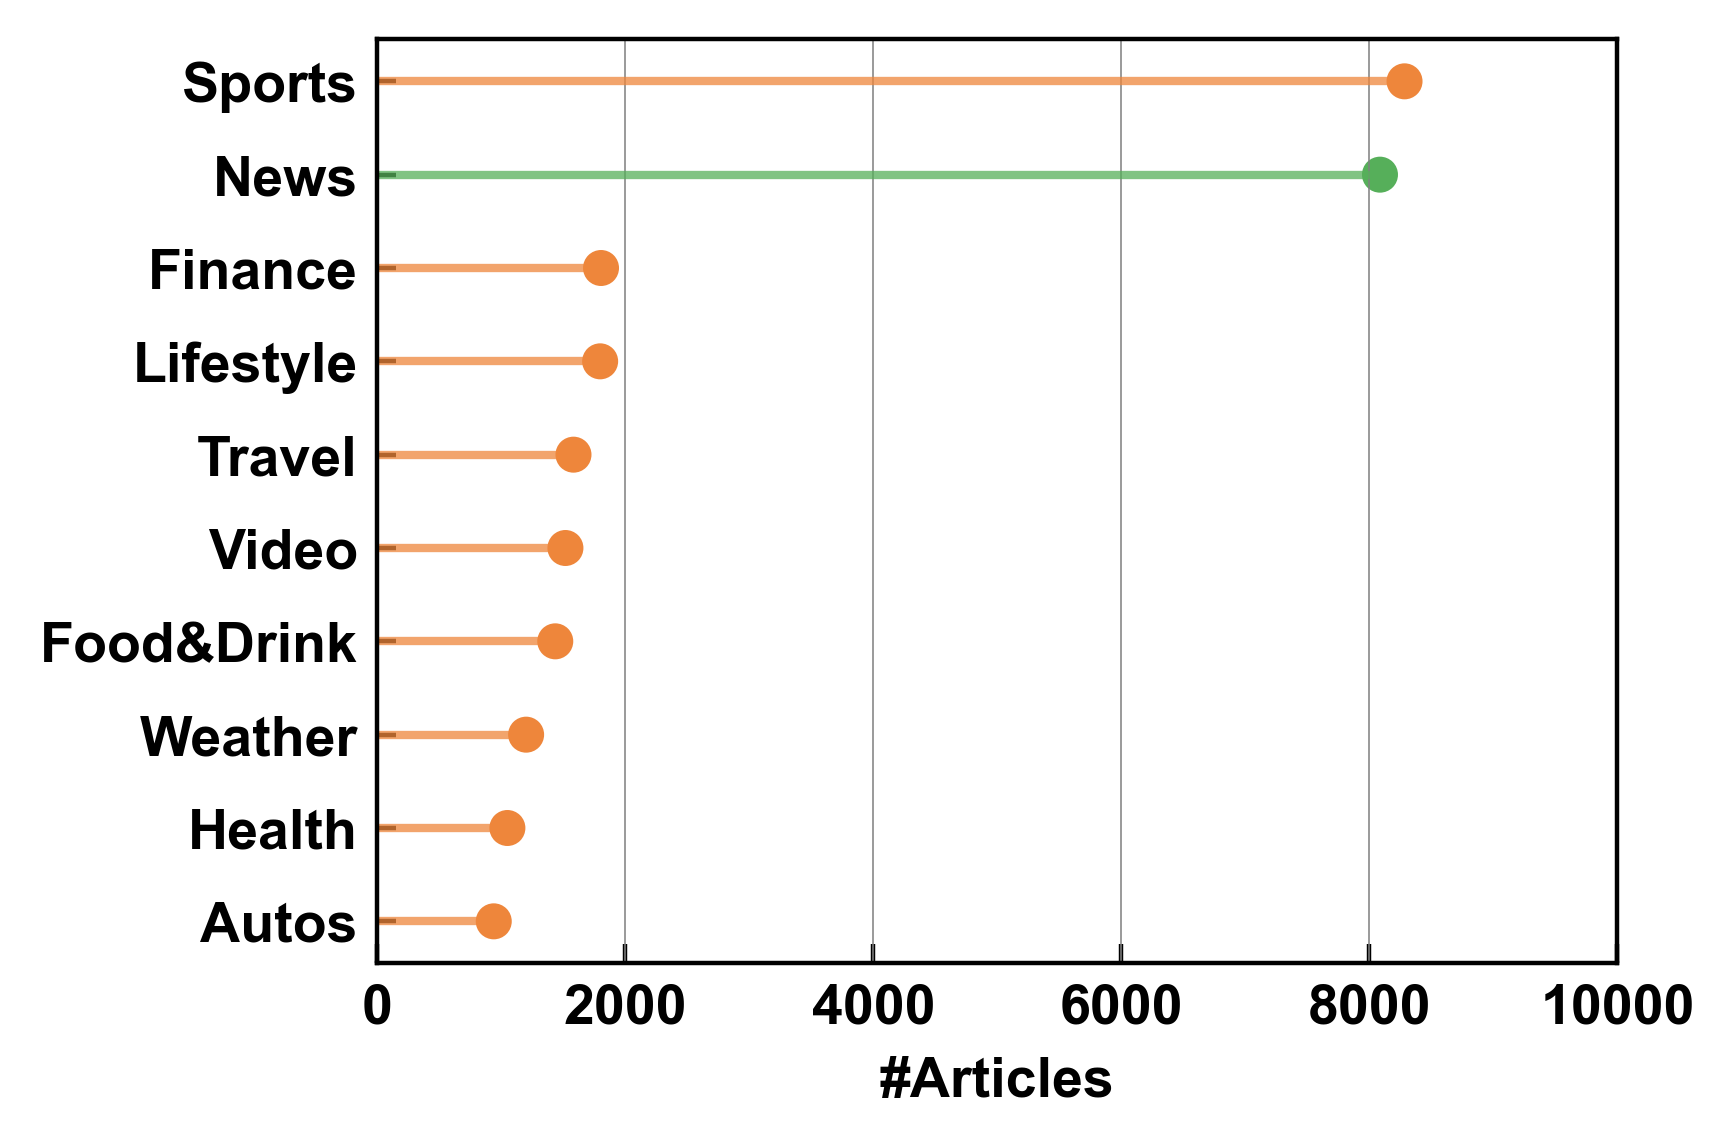

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import sys
from collections import defaultdict


with open('../data/i2cdf.pkl', 'rb') as file:
    i2c = pickle.load(file)
cate_arr = i2c.values.squeeze()
cate_dict = defaultdict(int)
for cateid in cate_arr:
    cate_dict[cateid] += 1
    
VALUES = np.array(list(cate_dict.values()))
sorted_indices = np.argsort(VALUES)
LABELS = np.array(['Lifestyle', 'Health', 'News', 'Autos', 'TV', 'Food&Drink', 'Travel', 'Sports', 'Finance', 'Weather', 'Movies', 'Entertainment', 'Video', 'Kids', 'Music', 'North America'])
VALUES, LABELS = VALUES[sorted_indices], LABELS[sorted_indices]
my_range = [i for i in range(len(cate_dict))]
my_color = (['#EE863B','#56AF5A']+['#EE863B' for i in range(len(cate_dict)-2)])[::-1]
my_size = ([30,30]+[30 for i in range(len(cate_dict)-2)])[::-1]
VALUES, LABELS, my_range, my_color, my_size = VALUES[-10:], LABELS[-10:], my_range[:10], my_color[-10:], my_size[-10:]

plt.figure()
fig, ax = plt.subplots(figsize=(4,3),dpi=400)
plt.yticks(fontproperties='Arial', size=10, weight='bold')
plt.xticks(fontproperties='Arial', size=10, weight='bold')
plt.tick_params(direction='in')
plt.axvline(x=2000, c="grey", ls="-", lw=0.28)
plt.axvline(x=4000, c="grey", ls="-", lw=0.28)
plt.axvline(x=6000, c="grey", ls="-", lw=0.28)
plt.axvline(x=8000, c="grey", ls="-", lw=0.28)

ax.hlines(y=my_range, xmin=0, xmax=VALUES, color=my_color, alpha=0.75, ls='-')
ax.scatter(VALUES, my_range, color=my_color, s=my_size, alpha=1)
ax.set_yticks(my_range, LABELS)
ax.set_xlim((0,10000))
ax.set_xticks([0,2000,4000,6000,8000,10000])
ax.set_xlabel('#Articles', fontproperties='Arial', fontweight='bold')
# plt.savefig('../figures/category_distribution.pdf', dpi=400,bbox_inches='tight',pad_inches=0)
plt.show()

the largest 10 subcategories of the News category

<Figure size 640x480 with 0 Axes>

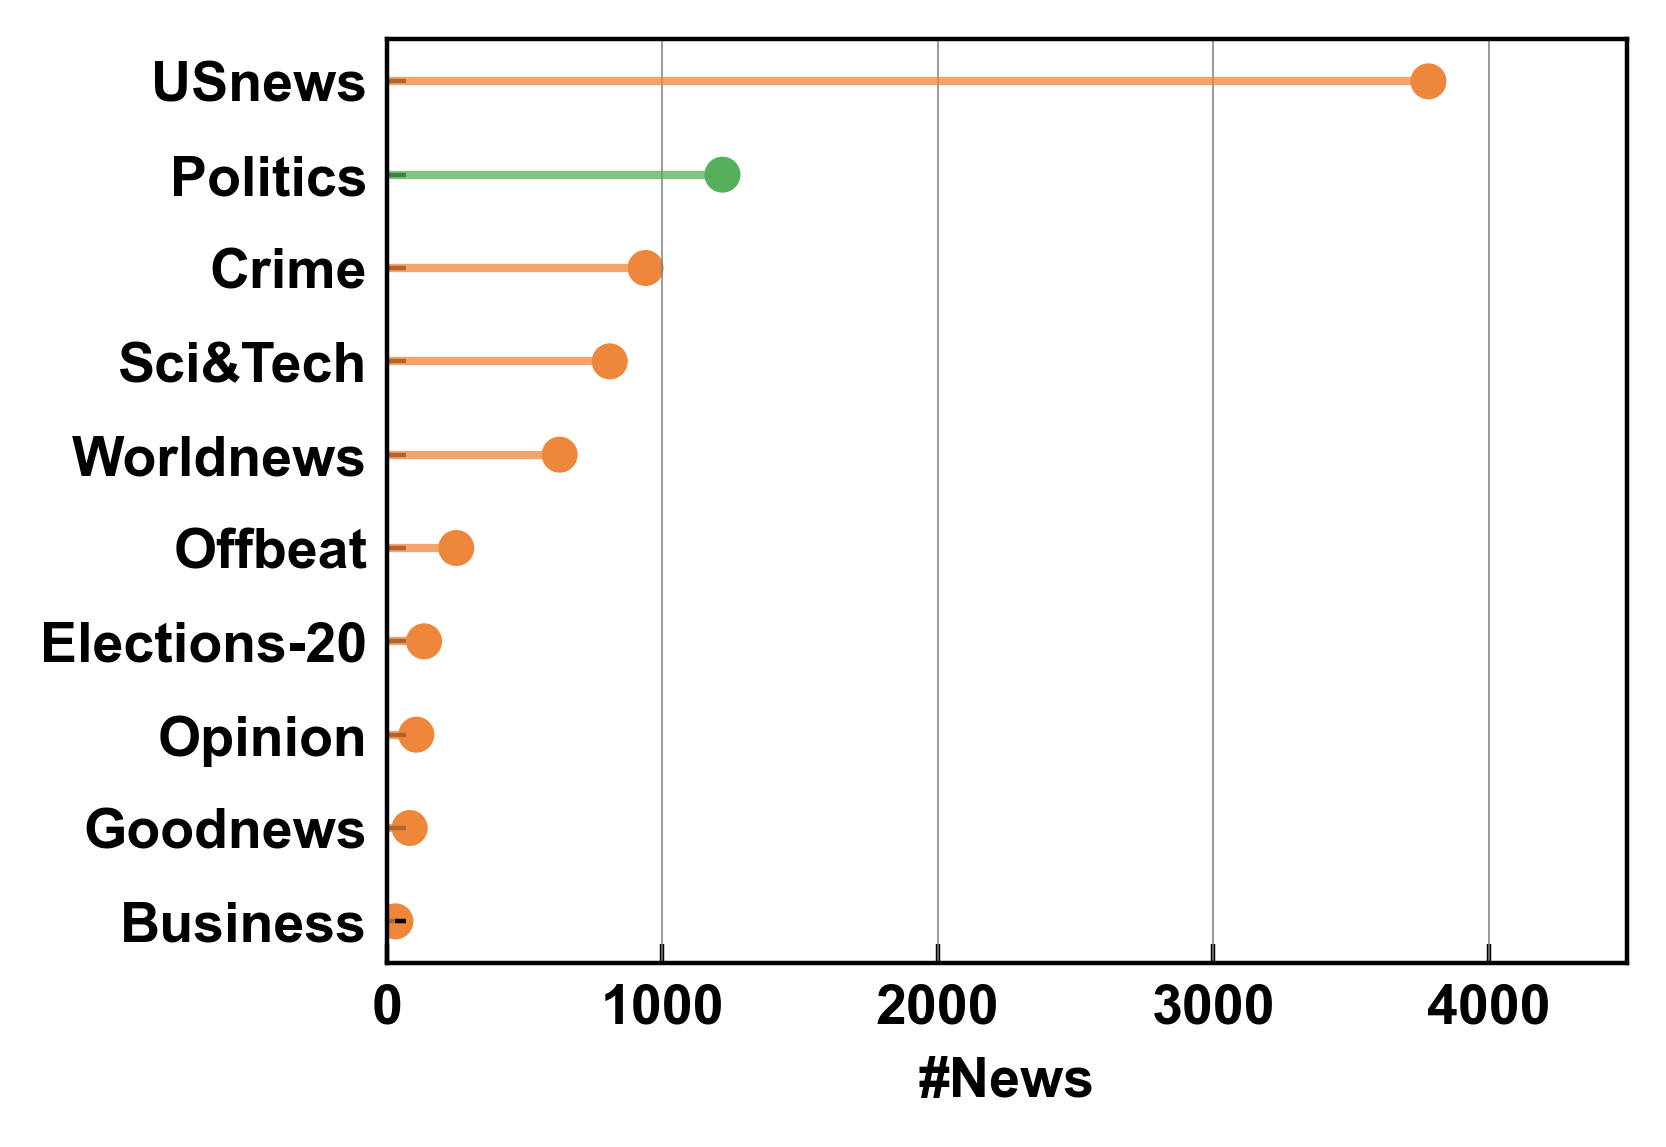

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

news = pd.read_csv('../data/all_news.csv').set_index('i')
subcategory_list = list(news['subcategory'])
subcate_dict = defaultdict(int)
for subcate in subcategory_list:
    subcate_dict[subcate] += 1

subcate_arr, count_arr = np.array(list(subcate_dict.keys())), np.array(list(subcate_dict.values()))
sorted_indices = np.argsort(count_arr)[-10:]
subcate_arr, count_arr = subcate_arr[sorted_indices], count_arr[sorted_indices]
my_color = ['#EE863B','#56AF5A','#EE863B','#EE863B','#EE863B','#EE863B','#EE863B','#EE863B','#EE863B','#EE863B'][::-1]
my_size = [30,30,30,30,30,30,30,30,30,30][::-1]

plt.figure()
fig, ax = plt.subplots(figsize=(4,3),dpi=400)
plt.yticks(fontproperties='Arial', size=10, weight='bold')#设置大小及加粗
plt.xticks(fontproperties='Arial', size=10, weight='bold')
plt.tick_params(direction='in')

plt.axvline(x=1000, c="grey", ls="-", lw=0.28)
plt.axvline(x=2000, c="grey", ls="-", lw=0.28)
plt.axvline(x=3000, c="grey", ls="-", lw=0.28)
plt.axvline(x=4000, c="grey", ls="-", lw=0.28)

ax.hlines(y=[i for i in range(10)], xmin=0, xmax=count_arr, color=my_color, alpha=0.75, ls='-')
ax.scatter(count_arr, [i for i in range(10)], color=my_color, s=my_size, alpha=1)
subcate_arr = ['Business', 'Goodnews', 'Opinion', 'Elections-20', 'Offbeat', 'Worldnews', 'Sci&Tech', 'Crime', 'Politics', 'USnews']
ax.set_yticks([i for i in range(10)], subcate_arr)

ax.set_xlim((0,4500))
ax.set_xticks([0,1000,2000,3000,4000])
ax.set_xlabel('#News', fontproperties='Arial', fontweight='bold')
# plt.savefig('../figures/news_subcategory_distribution.pdf', dpi=400,bbox_inches='tight',pad_inches=0)
plt.show()

the 15 largest sources w.r.t. #click of 1368 news j (AllSides & Ad Fontes)

/tmp/ipykernel_64028/39725051.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(),fontsize=10)


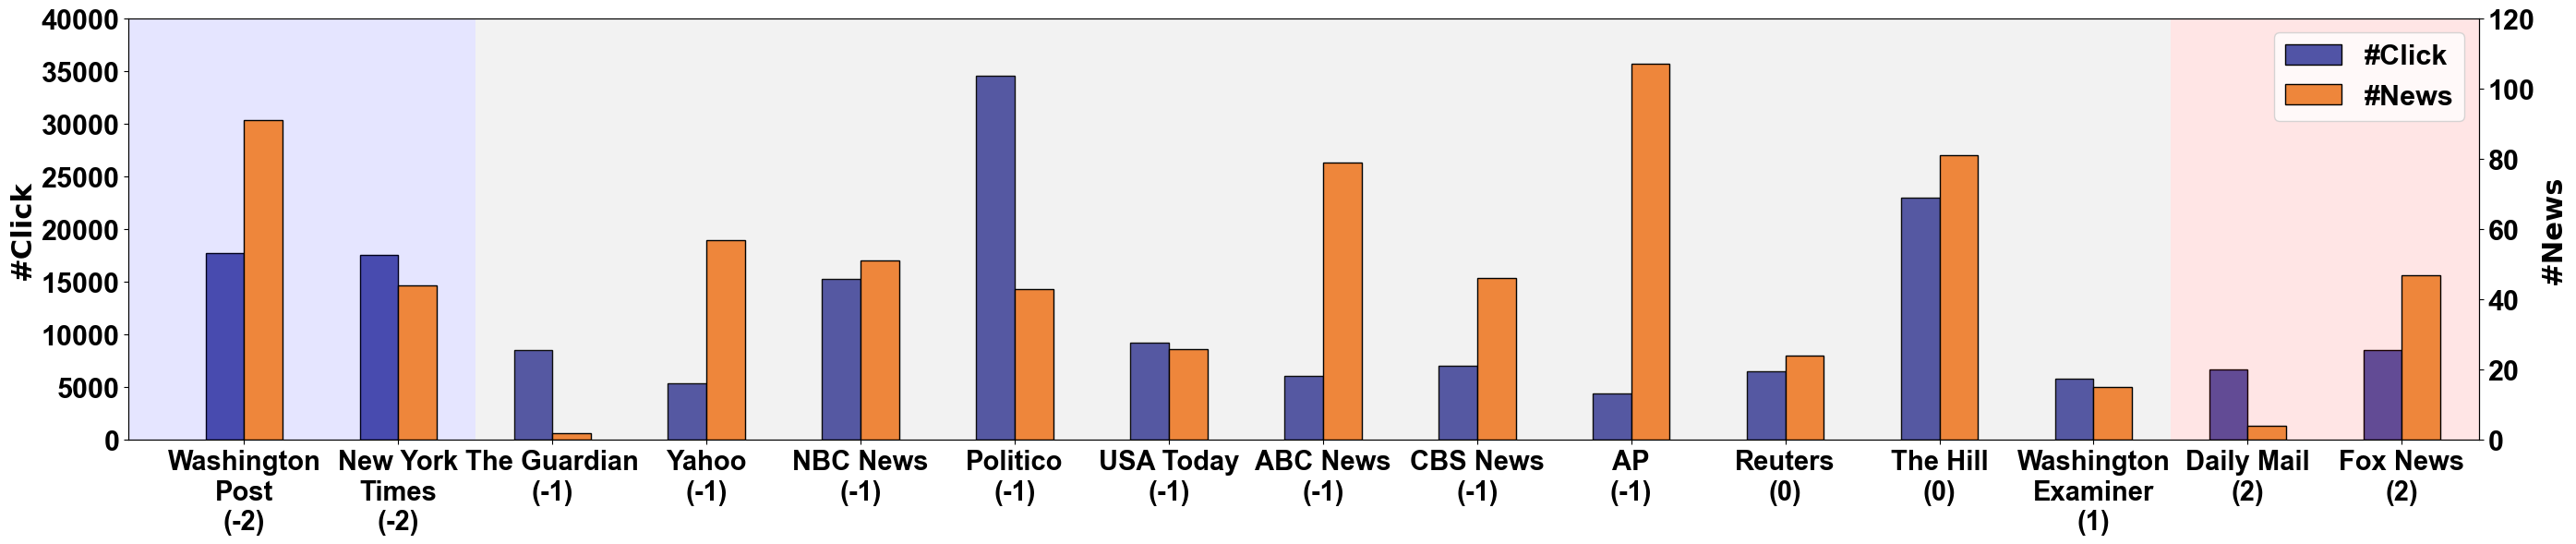

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
import numpy as np

source_all = pd.read_csv('../data/source_all.csv').set_index('news_id')
source_num, source_click = defaultdict(int), defaultdict(int)
for source_idx in source_all.index.values:
    c = source_all.at[source_idx,'click']
    s = source_all.at[source_idx,'source']
    if s == 'The New York Times':
        s = 'New York Times'
    source_click[s] += c
    source_num[s] += 1

mode = 'AllSides'
if mode == 'Ad Fontes Media':
    source_poli_dict = {'Washington Post':-9.02, 'The Guardian':-8.37, 'New York Times':-7.73, 'NBC News':-6.66, 'Politico':-6.50, 'Yahoo':-6.15, \
                        'USA Today':-4.87, 'ABC News':-4.41, 'CBS News':-3.15, 'AP':-1.96, 'Reuters':-1.38, 'The Hill':-1.19, 'Daily Mail':2.95, \
                            'Fox News':11.63, 'Washington Examiner':13.26}
elif mode == 'AllSides':
    source_poli_dict = {'Washington Post':-2, 'New York Times':-2, 'The Guardian':-1, 'Yahoo':-1, 'NBC News':-1, 'Politico':-1, 'USA Today':-1, \
                         'ABC News':-1, 'CBS News':-1, 'AP':-1, 'Reuters':0, 'The Hill':0, 'Washington Examiner':1, 'Daily Mail':2, 'Fox News':2}
source_4_click = []
for key in source_poli_dict:
    if key=='New York Times':
        source_4_click.append('New York\nTimes'+'\n('+str(source_poli_dict[key])+')')
    elif key=='Washington Post': 
        source_4_click.append('Washington\nPost'+'\n('+str(source_poli_dict[key])+')')
    elif key=='Washington Examiner': 
        source_4_click.append('Washington\nExaminer'+'\n('+str(source_poli_dict[key])+')')
    else:
        source_4_click.append(key+'\n('+str(source_poli_dict[key])+')')
        
click_list = [source_click[key] for key in source_poli_dict]
num_list = [source_num[key] for key in source_poli_dict]
width = 0.25
x1_list, x2_list = [], []
for i in range(len(source_poli_dict)):
    x1_list.append(i)
    x2_list.append(i + width)

fig, ax1 = plt.subplots(figsize=(28,6))
ax1.set_ylabel('#Click',fontsize=22, fontweight='bold')
ax1.set_ylim(0,40000)
ax1.set_xlim(2*width-1,14+3*width)
ax1.bar(x1_list, click_list, width=width, color='#5154A6', align='edge', label='#Click', edgecolor='black')
ax1.set_xticklabels(ax1.get_xticklabels(),fontsize=10)
if mode == 'AllSides':
    ax1.axvspan(2*width-1,1.5+width,facecolor='blue',alpha=0.1)
    ax1.axvspan(1.5+width,12.5+width,facecolor='grey',alpha=0.1)
    ax1.axvspan(12.5+width,14+3*width,facecolor='red',alpha=0.1)
elif mode == 'Ad Fontes Media':
    ax1.axvspan(2*width-1,1.5+width,facecolor='blue',alpha=0.1)
    ax1.axvspan(1.5+width,12.5+width,facecolor='grey',alpha=0.1)
    ax1.axvspan(12.5+width,14+3*width,facecolor='red',alpha=0.1)

plt.yticks(fontproperties='Arial', size=22, weight='bold')
plt.xticks(fontproperties='Arial', size=21, weight='bold')
ax2 = ax1.twinx()
ax2.set_ylabel('#News',fontsize=22, fontweight='bold')
ax2.set_ylim(0,120)
ax2.bar(x2_list, num_list, width=width, color='#EE863B', align='edge', tick_label=source_4_click, label='#News', edgecolor='black')
fig.legend(loc=1,bbox_to_anchor=(1,1),bbox_transform=ax1.transAxes,prop={'weight': 'bold', 'family':'Arial', 'size':22})

plt.yticks(fontproperties='Arial', size=22, weight='bold')
plt.xticks(fontproperties='Arial', size=21, weight='bold')
plt.tight_layout()
# plt.savefig('../figures/source_distribution_1368.pdf', dpi=400,bbox_inches='tight',pad_inches=0)
plt.show()

the jointplot of the 1,190 news bias ratings

SpearmanrResult(correlation=0.7113798974978445, pvalue=3.5788796335280456e-184)


/data/jinjq/anaconda3/envs/pytorch/lib/python3.8/site-packages/seaborn/axisgrid.py:2203: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): rug.
  warnings.warn(msg, UserWarning)


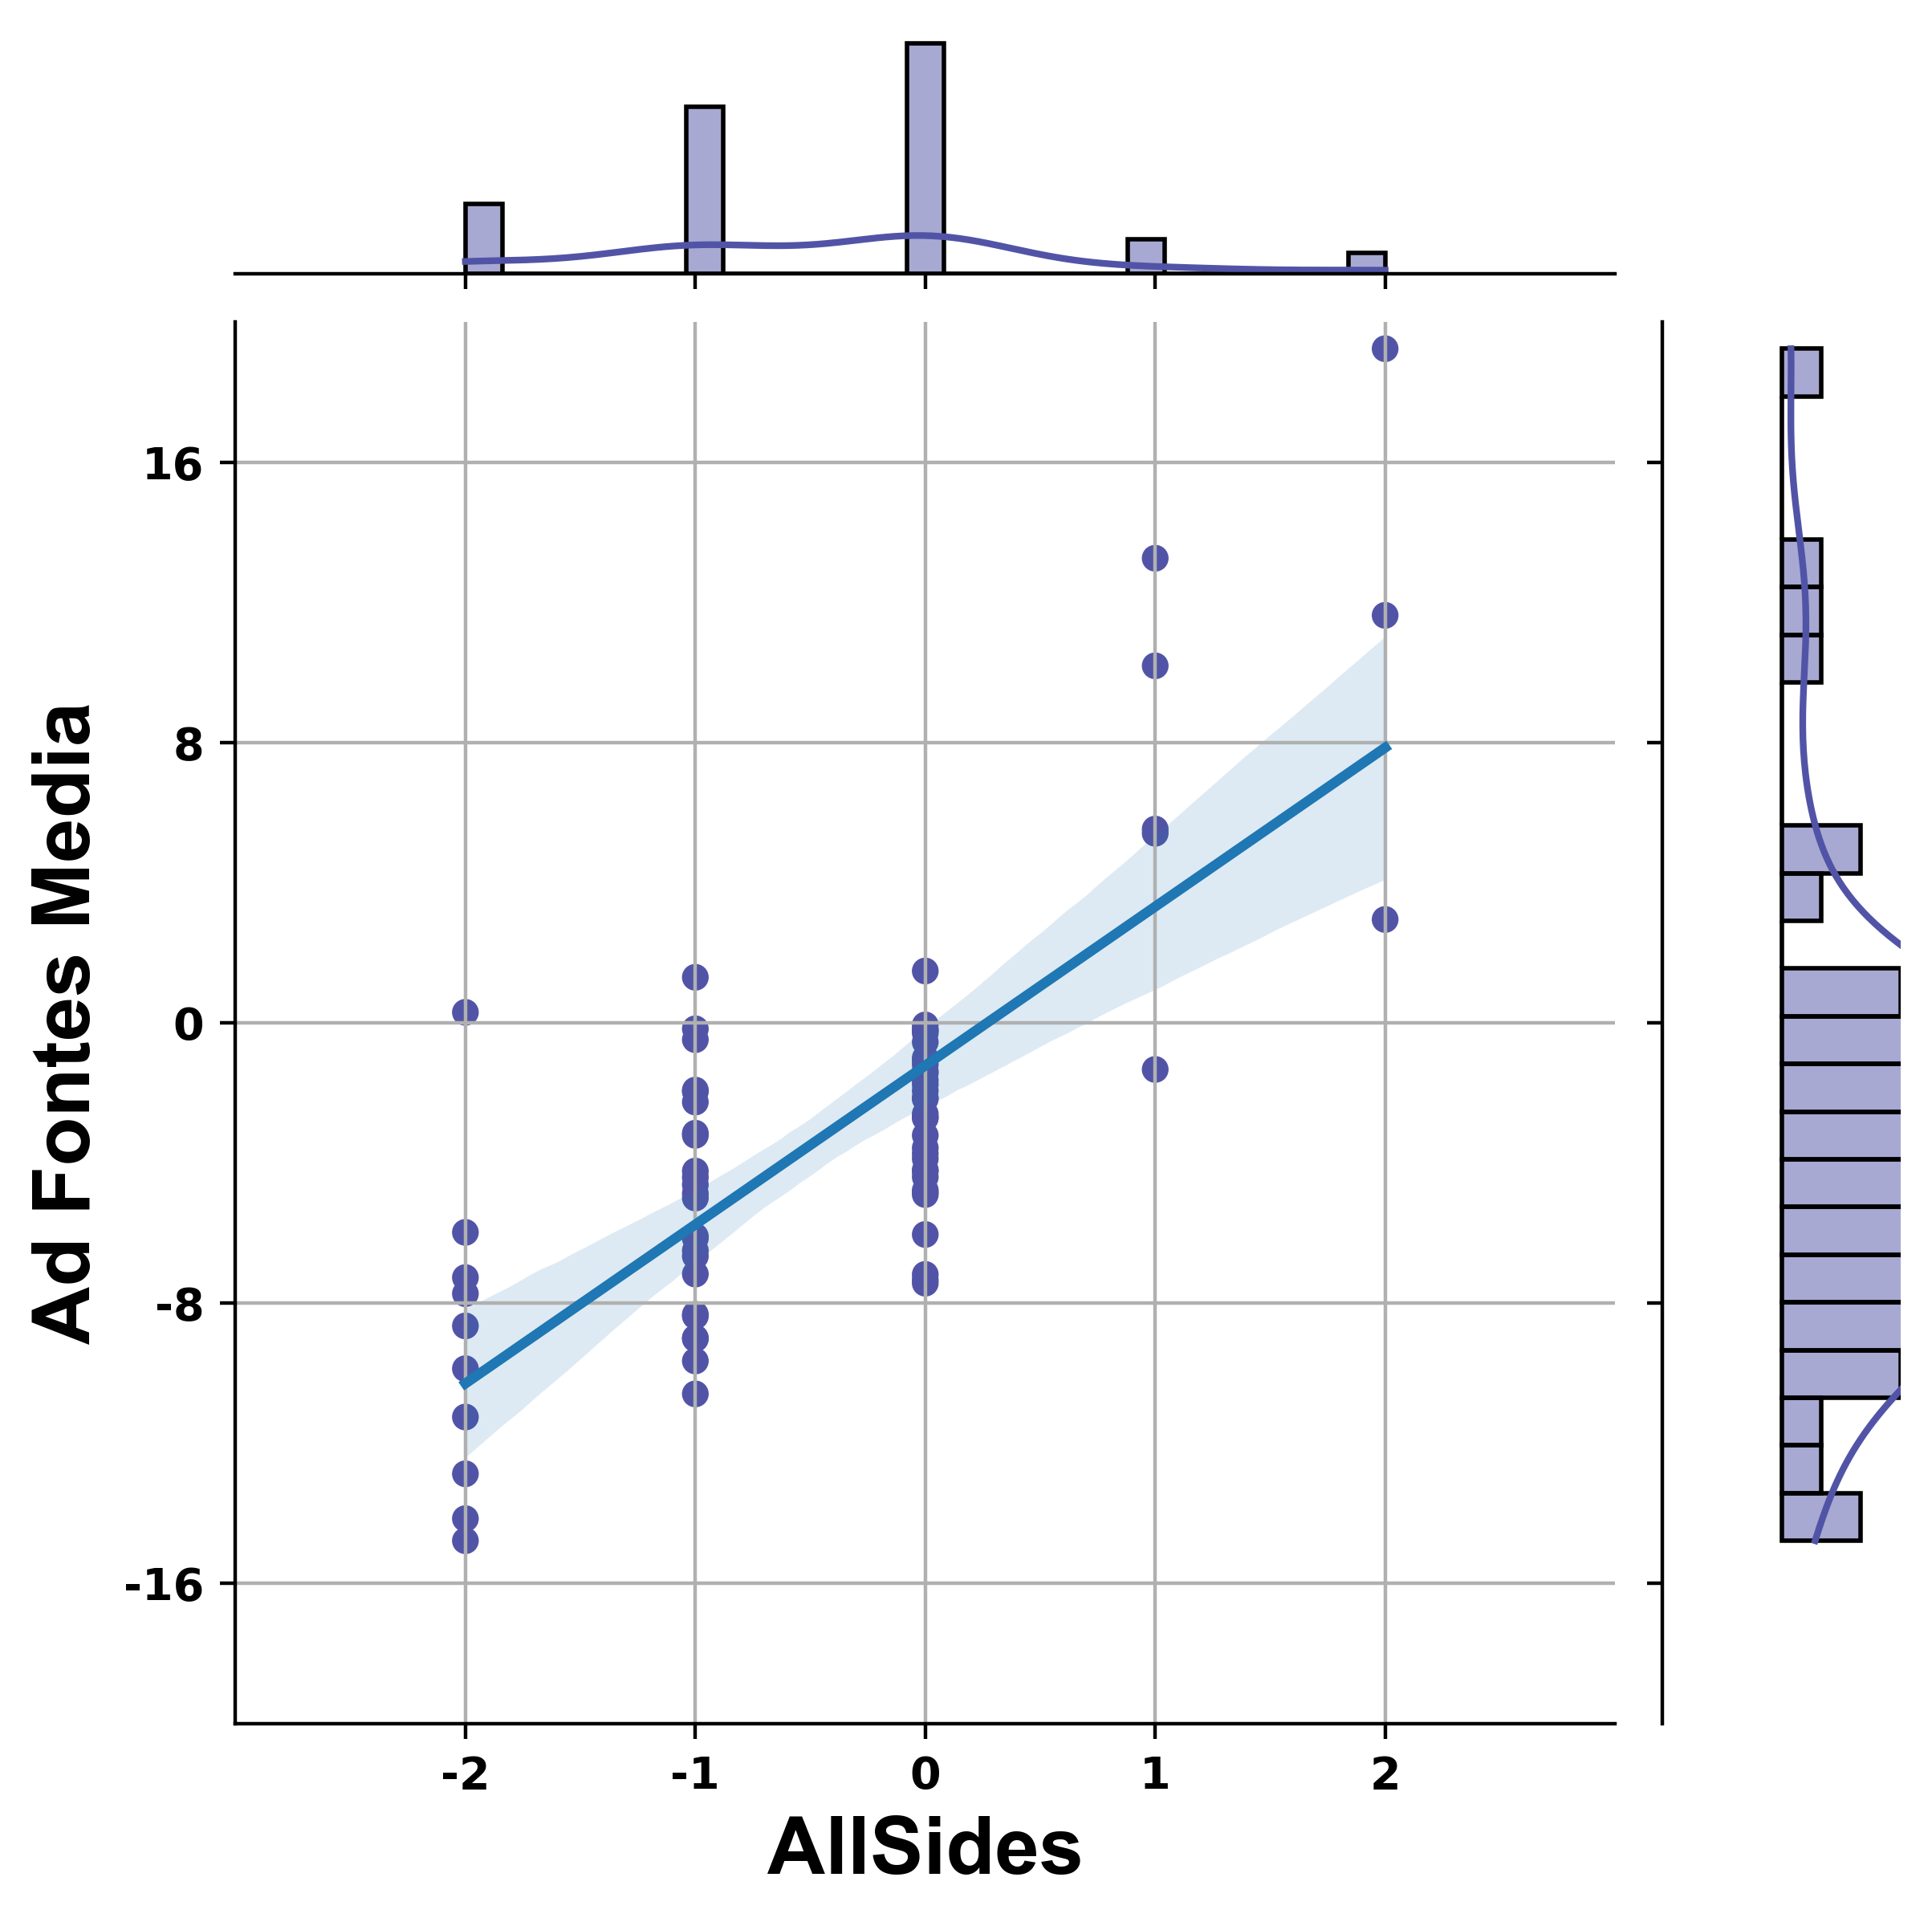

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

source_all = pd.read_csv('../data/source_all.csv').set_index('i')
source_all = source_all[source_all['poli2']<66]
source_all = source_all[source_all['poli5']<66]
source_all.reset_index(inplace=True)
print(stats.spearmanr(source_all['poli5'].values,source_all['poli2'].values))
source_all = source_all.rename(columns={'poli2':'Ad Fontes Media', 'poli5':'AllSides'})

grouped_data = source_all.groupby(['AllSides', 'Ad Fontes Media']).size().reset_index(name='counts')

g = sns.jointplot(data=grouped_data, x="AllSides", y="Ad Fontes Media", kind="reg", dropna=False, marginal_kws=dict(bins=25, rug=True, color='#5154A6'))
g.fig.set_dpi(400)
g.fig.set_figsize=(3,3)

g.ax_joint.cla()

sns.scatterplot(data=grouped_data, x="AllSides", y="Ad Fontes Media", edgecolor="none", legend=False, ax=g.ax_joint, color='#5154A6')

sns.regplot(data=grouped_data, x="AllSides", y="Ad Fontes Media", scatter=False, ax=g.ax_joint)

g.ax_joint.grid(True)
# plt.figure(figsize=(3,3),dpi=400)
plt.xlim((-3,3))
plt.ylim((-20,20))
g.ax_joint.set_xticks([-2,-1,0,1,2],['-2','-1','0','1','2'], fontweight='bold')
g.ax_joint.set_yticks([-16,-8,0,8,16],['-16','-8','0','8','16'], fontweight='bold')
g.ax_joint.set_xlim([-3,3])
g.ax_joint.set_ylim([-20,20])

# Set axis labels bold
g.ax_joint.set_xlabel("AllSides", fontproperties='Arial', fontweight='bold', size=18)
g.ax_joint.set_ylabel("Ad Fontes Media", fontproperties='Arial', fontweight='bold', size=18)
# plt.savefig('../figures/correlation_bias.pdf', dpi=400, bbox_inches='tight', pad_inches=0)
plt.show()

the 15 largest sources w.r.t. #click of 716 news j (AllSides & Ad Fontes)

/tmp/ipykernel_64028/2365448942.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(),fontsize=10)


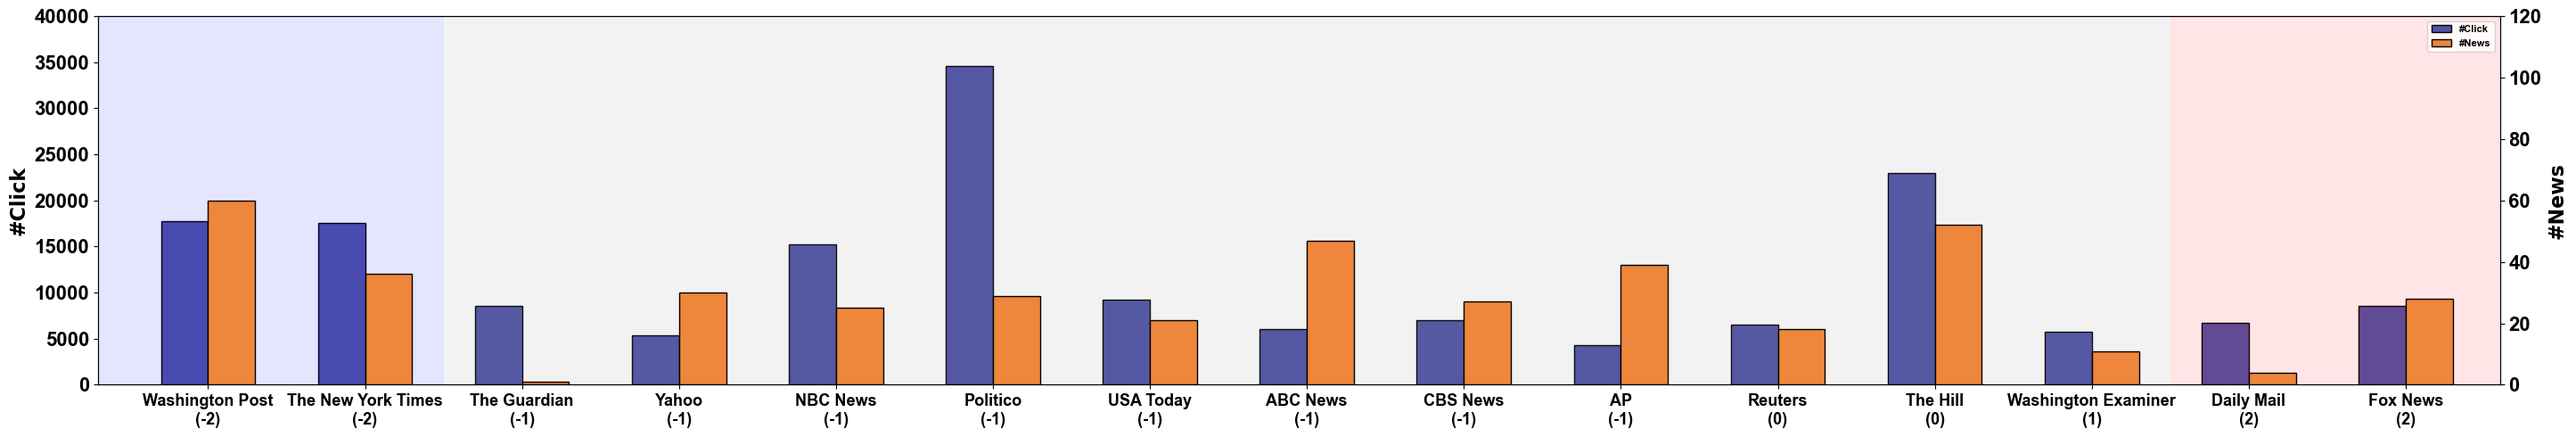

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
import numpy as np
import pickle

source_all = pd.read_csv('../data/source_all.csv').set_index('i')
with open('../policy/get_effect/result/mind/policy_effect_o2j.pkl', 'rb') as file:
    peo2j = pickle.load(file)
selected_j = set()
for j in peo2j:
    if j in source_all.index and len(peo2j[j]) > 0 and source_all.loc[j,'click'] > 0:
        selected_j.add(j)

source_num, source_click = defaultdict(int), defaultdict(int)
for source_idx in selected_j:
    c = source_all.at[source_idx,'click']
    s = source_all.at[source_idx,'source']
    source_click[s] += c
    source_num[s] += 1

mode = 'AllSides'
if mode == 'Ad Fontes Media':
    source_poli_dict = {'Washington Post':-9.02, 'The Guardian':-8.37, 'The New York Times':-7.73, 'NBC News':-6.66, 'Politico':-6.50, 'Yahoo':-6.15, \
                        'USA Today':-4.87, 'ABC News':-4.41, 'CBS News':-3.15, 'AP':-1.96, 'Reuters':-1.38, 'The Hill':-1.19, 'Daily Mail':2.95, \
                            'Fox News':11.63, 'Washington Examiner':13.26}
elif mode == 'AllSides':
    source_poli_dict = {'Washington Post':-2, 'The New York Times':-2, 'The Guardian':-1, 'Yahoo':-1, 'NBC News':-1, 'Politico':-1, 'USA Today':-1, \
                         'ABC News':-1, 'CBS News':-1, 'AP':-1, 'Reuters':0, 'The Hill':0, 'Washington Examiner':1, 'Daily Mail':2, 'Fox News':2}
source_4_click = [key+'\n('+str(source_poli_dict[key])+')' for key in source_poli_dict]
click_list = [source_click[key] for key in source_poli_dict]
num_list = [source_num[key] for key in source_poli_dict]
width = 0.3
x1_list, x2_list = [], []
for i in range(len(source_poli_dict)):
    x1_list.append(i)
    x2_list.append(i + width)

fig, ax1 = plt.subplots(figsize=(29,5))
ax1.set_ylabel('#Click',fontsize=16, fontweight='bold')
ax1.set_ylim(0,40000)
ax1.set_xlim(2*width-1,14+3*width)
ax1.bar(x1_list, click_list, width=width, color='#5154A6', align='edge', label='#Click', edgecolor='black')
ax1.set_xticklabels(ax1.get_xticklabels(),fontsize=10)
if mode == 'AllSides':
    ax1.axvspan(2*width-1,1.5+width,facecolor='blue',alpha=0.1)
    ax1.axvspan(1.5+width,12.5+width,facecolor='grey',alpha=0.1)
    ax1.axvspan(12.5+width,14+3*width,facecolor='red',alpha=0.1)
elif mode == 'Ad Fontes Media':
    ax1.axvspan(2*width-1,1.5+width,facecolor='blue',alpha=0.1)
    ax1.axvspan(1.5+width,12.5+width,facecolor='grey',alpha=0.1)
    ax1.axvspan(12.5+width,14+3*width,facecolor='red',alpha=0.1)

plt.yticks(fontproperties='Arial', size=16, weight='bold')#设置大小及加粗
plt.xticks(fontproperties='Arial', size=13, weight='bold')
ax2 = ax1.twinx()
ax2.set_ylabel('#News',fontsize=16, fontweight='bold')
ax2.set_ylim(0,120)
ax2.bar(x2_list, num_list, width=width, color='#EE863B', align='edge', tick_label=source_4_click, label='#News', edgecolor='black')
fig.legend(loc=1,bbox_to_anchor=(1,1),bbox_transform=ax1.transAxes,prop={'weight': 'bold', 'family':'Arial', 'size':8})

plt.yticks(fontproperties='Arial', size=16, weight='bold')#设置大小及加粗
plt.xticks(fontproperties='Arial', size=13, weight='bold')

plt.tight_layout()
# plt.savefig('../figures/source_distribution_716.pdf', dpi=400,bbox_inches='tight',pad_inches=0)
plt.show()

Supplementary Experiments

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
from scipy import stats

def get_group(x):
    if x == 1:
        return 2    # Left
    elif x == 0:
        return 0    # Right
    else:
        return 1    # mid

print('processing data....')
index = pd.read_csv('../data/4.csv')
index.set_index('user', inplace=True)

t0, t1 = pd.read_csv('../data/t0.csv'), pd.read_csv('../data/t1.csv')
t0.set_index(['user'], inplace=True)
t1.set_index(['user'], inplace=True)
t0['u_group'] = [get_group(index.loc[i].history_rate) for i in t0.index]
t1['u_group'] = [get_group(index.loc[i].history_rate) for i in t1.index]

u_nums, t_nums = 3, 2
data = pd.DataFrame(np.empty(u_nums*3).reshape(u_nums, 3), index=['Right','Center','Left'], columns=['T0','T1','All'])
annot = pd.DataFrame(np.empty(u_nums*3).reshape(u_nums, 3), index=['Right','Center','Left'], columns=['T0','T1','All'])
yer_list = []
print('calculating....')

for i in tqdm.tqdm(range(u_nums)):
    sub_t0, sub_t1 = t0[t0.u_group==i], t1[t1.u_group==i]
    total = pd.concat([sub_t0,sub_t1])
    total.reset_index(drop=True)
    len0, len1, len_All = len(sub_t0), len(sub_t1), len(total)

    sub_t0['Left/All'] = sub_t0.click_left_num / (sub_t0.click_left_num + sub_t0.click_right_num)
    sub_t1['Left/All'] = sub_t1.click_left_num / (sub_t1.click_left_num + sub_t1.click_right_num)
    sub_t0['l_ctr'] = sub_t0.click_left_num / (sub_t0.click_left_num + sub_t0.unclick_left_num)
    sub_t1['l_ctr'] = sub_t1.click_left_num / (sub_t1.click_left_num + sub_t1.unclick_left_num)
    sub_t0['r_ctr'] = sub_t0.click_right_num / (sub_t0.click_right_num + sub_t0.unclick_right_num)
    sub_t1['r_ctr'] = sub_t1.click_right_num / (sub_t1.click_right_num + sub_t1.unclick_right_num)
    sub_t0['l/r'] = sub_t0.l_ctr / sub_t0.r_ctr
    sub_t1['l/r'] = sub_t1.l_ctr / sub_t1.r_ctr

    total['Left/All'] = total.click_left_num / (total.click_left_num + total.click_right_num)
    total['l_ctr'] = total.click_left_num / (total.click_left_num + total.unclick_left_num)
    total['r_ctr'] = total.click_right_num / (total.click_right_num + total.unclick_right_num)
    total['l/r'] = total.l_ctr / total.r_ctr

    data.iloc[i,0] = sub_t0['Left/All'].dropna().sum() / len(sub_t0['Left/All'].dropna())
    data.iloc[i,1] = sub_t1['Left/All'].dropna().sum() / len(sub_t1['Left/All'].dropna())
    annot.iloc[i,0] = '{:.4f}'.format(sub_t0['Left/All'].dropna().sum()/len(sub_t0['Left/All'].dropna()))
    annot.iloc[i,1] = '{:.4f}'.format(sub_t1['Left/All'].dropna().sum()/len(sub_t1['Left/All'].dropna()))

    data.iloc[i,2] = total['Left/All'].dropna().sum() / len(total['Left/All'].dropna())
    annot.iloc[i,2] = '{:.4f}'.format(total['Left/All'].dropna().sum()/len(total['Left/All'].dropna()))
    total_left_all = total['Left/All'].dropna().tolist()
    l, r = stats.norm.interval(alpha=0.95, loc=np.mean(total_left_all), scale=stats.sem(total_left_all))
    m, s = np.mean(total_left_all), np.std(total_left_all)/np.sqrt(len(total_left_all))
    yer_list.append(r-m)

processing data....
calculating....


  0%|          | 0/3 [00:00<?, ?it/s]/tmp/ipykernel_64028/2885077179.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_t0['Left/All'] = sub_t0.click_left_num / (sub_t0.click_left_num + sub_t0.click_right_num)
/tmp/ipykernel_64028/2885077179.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_t1['Left/All'] = sub_t1.click_left_num / (sub_t1.click_left_num + sub_t1.click_right_num)
/tmp/ipykernel_64028/2885077179.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

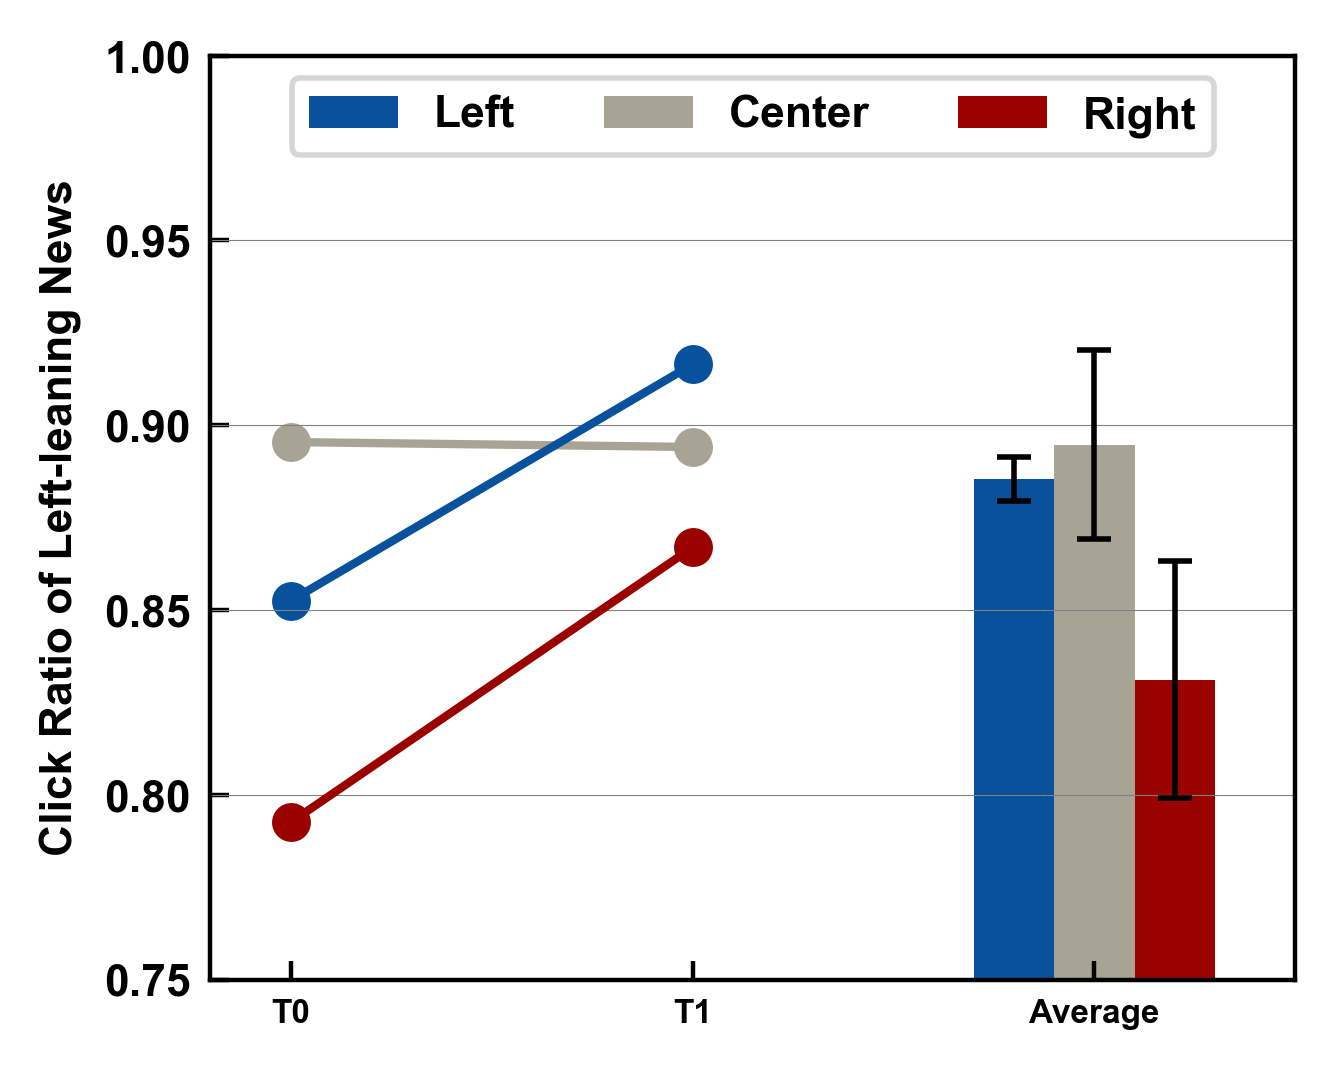

In [7]:
plt.figure(figsize=(3.5,3),dpi=400)
plt.xlim((0.8,3.5))
plt.ylim((0.75,1))
plt.ylabel('Click Ratio of Left-leaning News', fontproperties='Arial', fontsize=8, fontweight='bold')
plt.hlines([0.8,0.85,0.9,0.95],xmin=0.8,xmax=3.5, color='grey', ls='-', lw=0.2)

plt.plot([1,2],[data.iloc[0,0], data.iloc[0,1]], color='#9a0200')
plt.scatter(1,data.iloc[0,0],color='#9a0200',marker='o')
plt.scatter(2,data.iloc[0,1],color='#9a0200',marker='o')

plt.plot([1,2],[data.iloc[1,0], data.iloc[1,1]], c='#a8a495')
plt.scatter(1,data.iloc[1,0],color='#a8a495',marker='o')
plt.scatter(2,data.iloc[1,1],color='#a8a495',marker='o')

plt.plot([1,2],[data.iloc[2,0], data.iloc[2,1]], c='#08519c')
plt.scatter(1,data.iloc[2,0],color='#08519c',marker='o')
plt.scatter(2,data.iloc[2,1],color='#08519c',marker='o')

width=0.2
error_params=dict(elinewidth=1, ecolor='black', capsize=3)
plt.bar([3-width],data.iloc[2,2],width,color='#08519c', label='Left', yerr=yer_list[2], error_kw=error_params)
plt.bar([3],data.iloc[1,2],width,color='#a8a495', label='Center', yerr=yer_list[1], error_kw=error_params)
plt.bar([3+width],data.iloc[0,2],width,color='#9a0200', label='Right', yerr=yer_list[0], error_kw=error_params)

plt.yticks(fontproperties='Arial', size=8, weight='bold')
plt.xticks([1,2,3],['T0','T1','Average'],fontproperties='Arial', size=6, weight='bold')
plt.legend(loc=9, ncol=3, prop={'weight': 'bold', 'family':'Arial', 'size':8})
plt.tick_params(direction='in')
# plt.savefig('../figures/supp_exp.pdf', dpi=400, bbox_inches='tight', pad_inches=0)
plt.show()

All categories v.s. l/c/r (AllSides) 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import tqdm
from scipy import stats
from collections import defaultdict

source_all = pd.read_csv('../data/source_all.csv')
mode = 'AllSides'   # 'Ad Fontes Media', 'AllSides
if mode == 'AllSides':
    poli_range = [-10,-1.5,1.5,10]
    suffix = 'allsides5'
    i2poli = source_all[source_all['poli5']<10]
    i2poli = i2poli[['i','poli5']]
    i2poli.rename(columns={'poli5':'poli'},inplace=True)
elif mode == 'Ad Fontes Media':
    poli_range = [-20,-8,8-0.001,30]
    suffix = 'adfontesmedia2'
    i2poli = source_all[source_all['poli2']<90]
    i2poli = i2poli[['i','poli2']]
    i2poli.rename(columns={'poli2':'poli'},inplace=True)

i2poli, source_all = i2poli.set_index('i'), source_all.set_index('i')
with open('../policy/get_effect/result/mind/policy_effect_o2j.pkl', 'rb') as file:
    peo2j = pickle.load(file)
news = pd.read_csv('../data/all_news.csv').set_index('i')

with open('../data/i2cdf.pkl', 'rb') as file:
    i2c = pickle.load(file)
cate_arr,cate_dict = i2c.values.squeeze(),defaultdict(int)
for cateid in cate_arr:
    cate_dict[cateid] += 1
VALUES = np.array(list(cate_dict.values()))
sorted_indices = np.argsort(VALUES)[-10:]
LABELS = np.array(['Lifestyle', 'Health', 'News', 'Autos', 'TV', 'Food&Drink', 'Travel', 'Sports', 'Finance', 'Weather', 'Movies', 'Entertainment', 'Video', 'Kids', 'Music', 'North America'])

In [9]:
ave_effect_arr, num_arr, left_list, right_list, mid_list = np.zeros((16,3)), np.zeros((16,3)), [], [], []
for a in tqdm.tqdm(list(range(16))):
    for b in [0,1,2]:
        v_effect = []
        for j in peo2j:
            if j not in i2poli.index or i2poli.loc[j,'poli'] <= poli_range[b] or i2poli.loc[j,'poli'] > poli_range[b+1] or source_all.loc[j,'click']<1:
                continue
            for v in peo2j[j]:
                if v not in i2c.index or i2c.loc[v][0]!= a:
                    continue
                v_effect.append(peo2j[j][v])
        ave_effect_arr[a,b], num_arr[a,b] = np.mean(v_effect), len(v_effect)
        if b==0:
            left_list.extend(v_effect)
        elif b==2:
            right_list.extend(v_effect)
        else:
            mid_list.extend(v_effect)

100%|██████████| 16/16 [09:40<00:00, 36.28s/it]


***** Wilcoxon-Mann-Whitney test *****
pval_left_right 1.9993701691291593e-95
pval_left_mid 3.853440784305752e-36
pval_mid_right 2.394273220098261e-55
0.0 0.0 0.0


<Figure size 640x480 with 0 Axes>

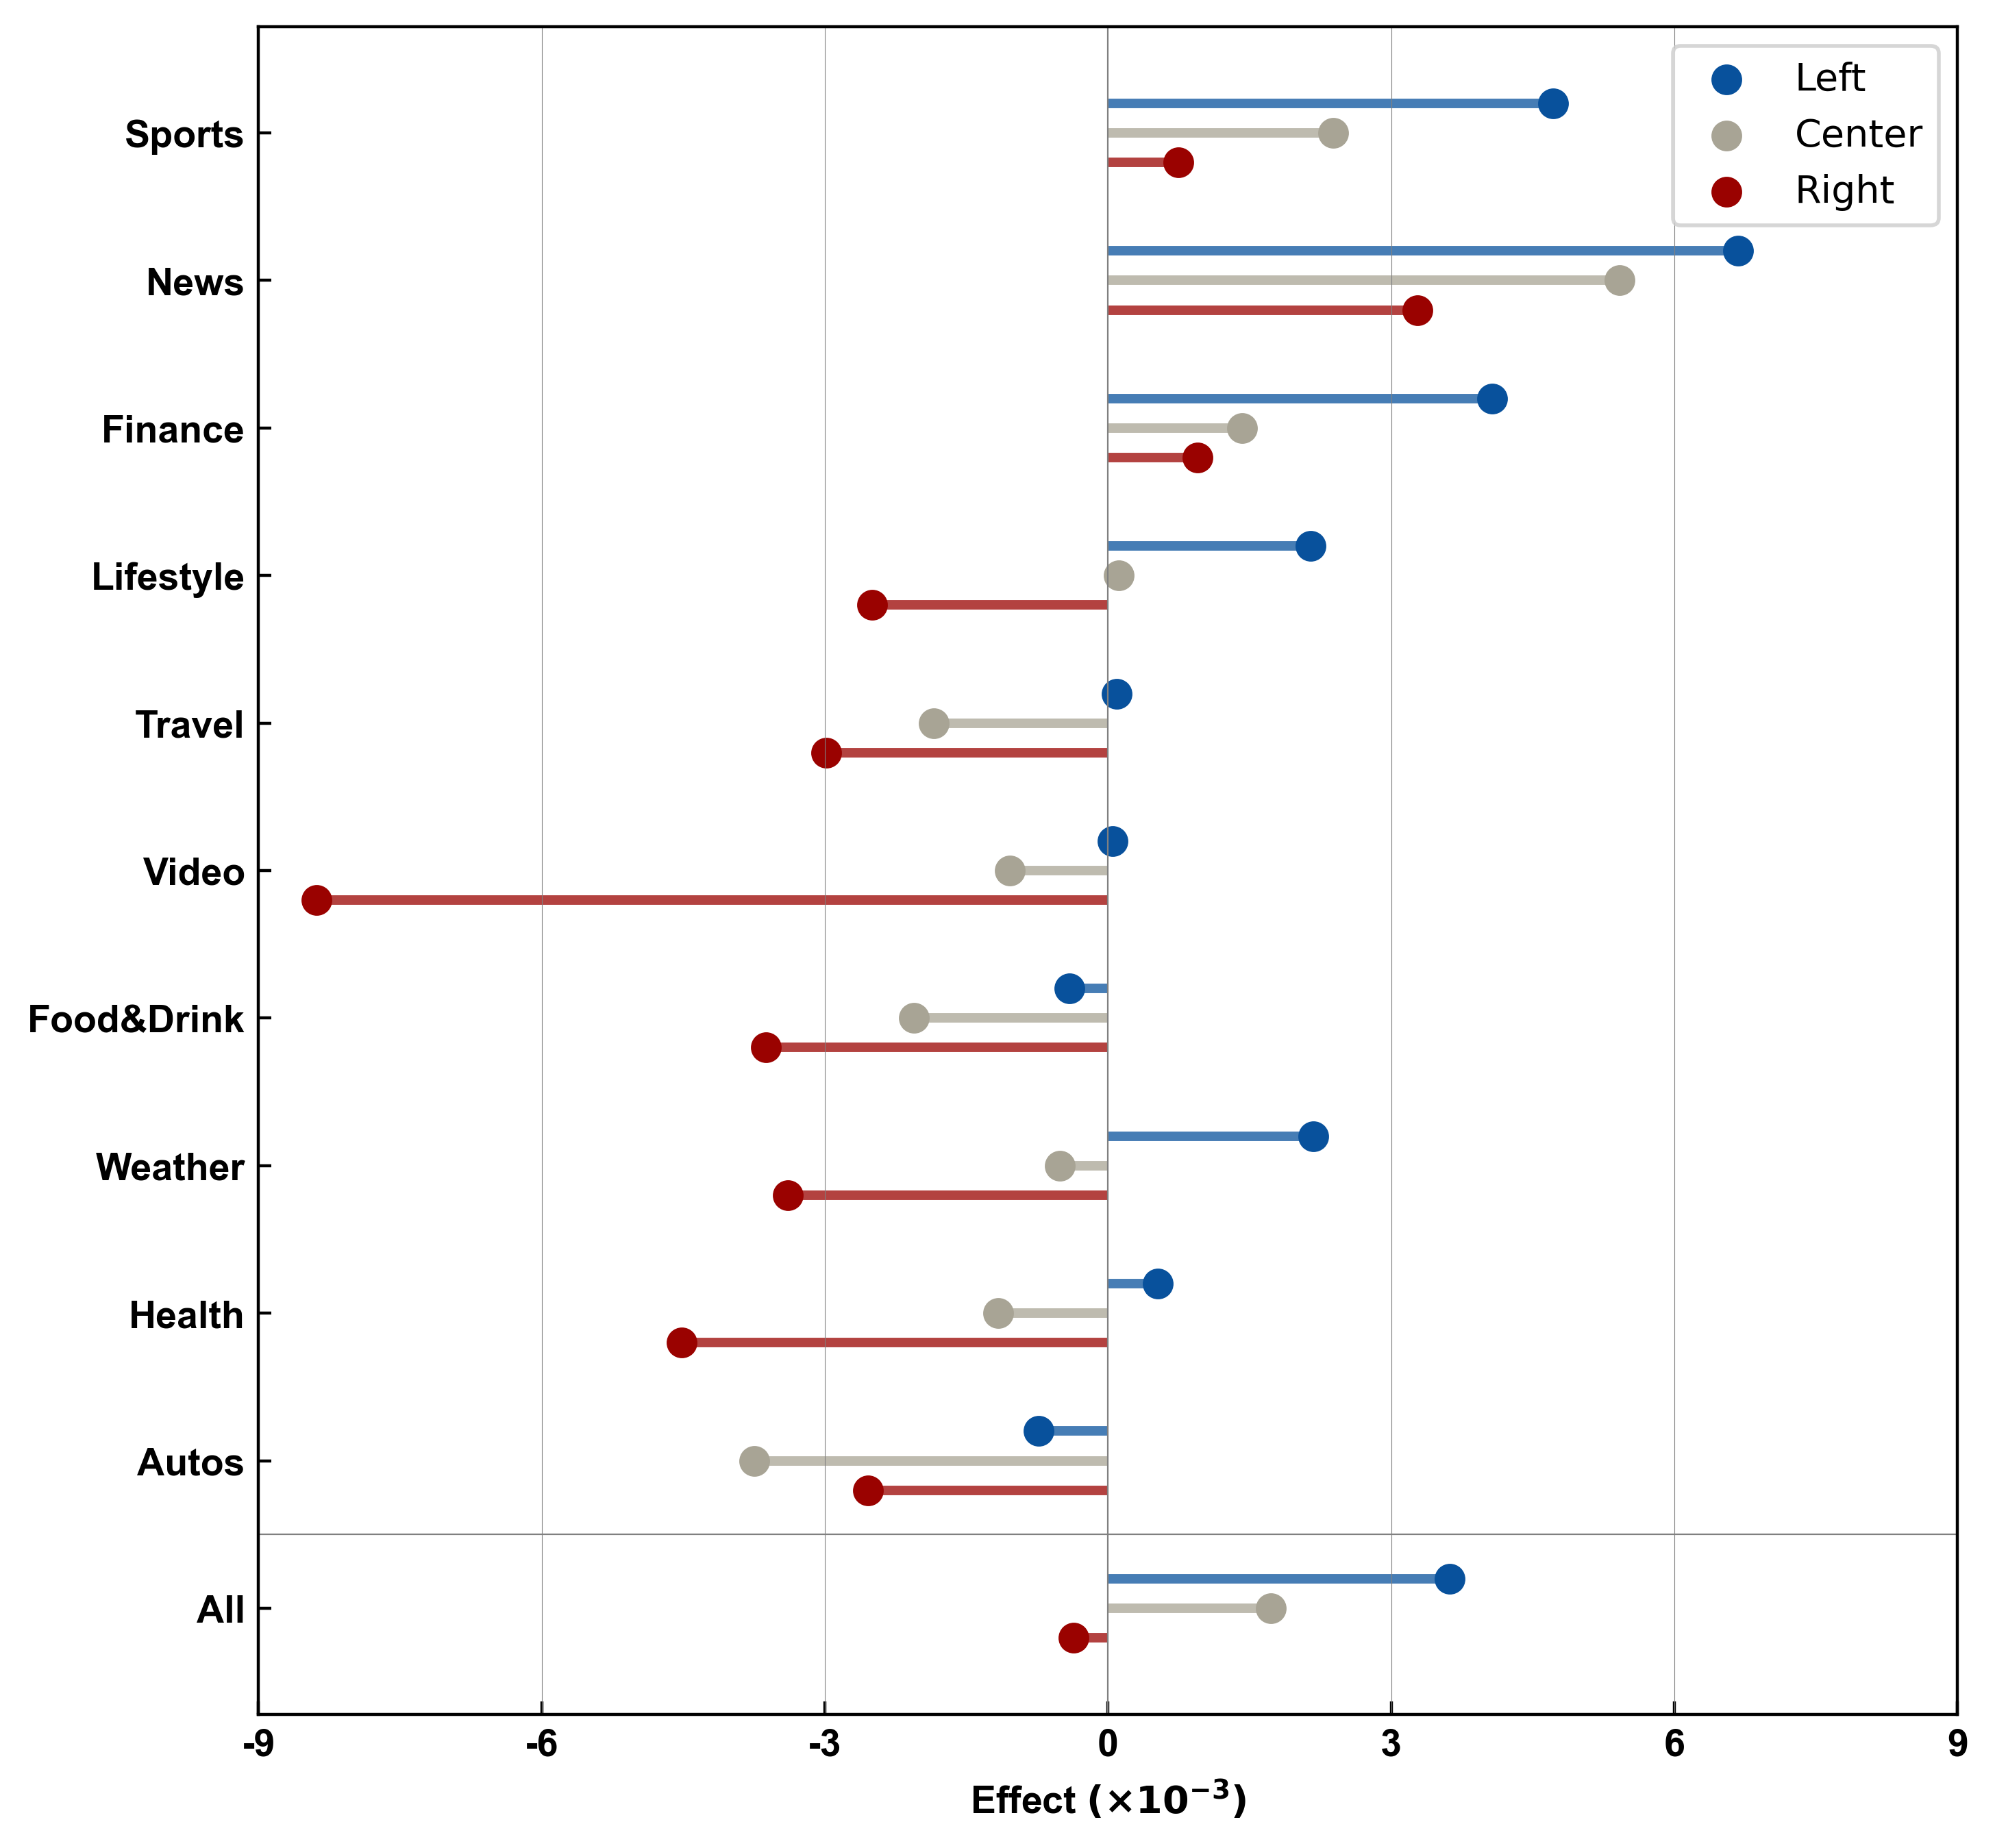

In [10]:
print('***** Wilcoxon-Mann-Whitney test *****')
pval_left_right = tuple(stats.mannwhitneyu(left_list, right_list, alternative='greater'))[1]
print('pval_left_right',pval_left_right)
pval_left_mid = tuple(stats.mannwhitneyu(left_list, mid_list, alternative='greater'))[1]
print('pval_left_mid',pval_left_mid)
pval_mid_right = tuple(stats.mannwhitneyu(mid_list, right_list, alternative='greater'))[1]
print('pval_mid_right',pval_mid_right)
print(np.median(left_list),np.median(mid_list),np.median(right_list))

plt.figure()
fig, ax = plt.subplots(figsize=(8,8),dpi=400)

left_effect_arr = ave_effect_arr[sorted_indices,0]
ax.hlines(y=[i+1.2 for i in range(10)], xmin=0, xmax=left_effect_arr, color='#08519c', alpha=0.75, ls='-', lw=2.5)
ax.scatter(left_effect_arr, [i+1.2 for i in range(10)], color='#08519c', s=50, alpha=1, label='Left')

mid_effect_arr = ave_effect_arr[sorted_indices,1]
ax.hlines(y=[i+1 for i in range(10)], xmin=0, xmax=mid_effect_arr, color='#a8a495', alpha=0.75, ls='-', lw=2.5)
ax.scatter(mid_effect_arr, [i+1 for i in range(10)], color='#a8a495', s=50, alpha=1, label='Center')

right_effect_arr = ave_effect_arr[sorted_indices,2]
ax.hlines(y=[i+0.8 for i in range(10)], xmin=0, xmax=right_effect_arr, color='#9a0200', alpha=0.75, ls='-', lw=2.5)
ax.scatter(right_effect_arr, [i+0.8 for i in range(10)], color='#9a0200', s=50, alpha=1, label='Right')
ax.legend(loc='upper right')

ax.hlines(y=0.2, xmin=0, xmax=np.mean(left_list), color='#08519c', alpha=0.75, ls='-', lw=2.5)
ax.scatter(np.mean(left_list), 0.2, color='#08519c', s=50, alpha=1)
ax.hlines(y=0, xmin=0, xmax=np.mean(mid_list), color='#a8a495', alpha=0.75, ls='-', lw=2.5)
ax.scatter(np.mean(mid_list), 0, color='#a8a495', s=50, alpha=1)
ax.hlines(y=-0.2, xmin=0, xmax=np.mean(right_list), color='#9a0200', alpha=0.75, ls='-', lw=2.5)
ax.scatter(np.mean(right_list), -0.2, color='#9a0200', s=50, alpha=1)

if mode == 'AllSides':
    ax.set_xlim((-0.009,0.009))
    ax.set_xticks(np.arange(-0.009,0.0091,0.003),labels=['-9','-6','-3','0','3','6','9'])
    ax.hlines(y=0.5, xmin=-0.009, xmax=0.009, color='grey', ls='-', lw=0.4)
    for x in [-0.006,-0.003,0.003,0.006]:
        plt.axvline(x=x, c="grey", ls="-", lw=0.2)
    plt.axvline(x=0, c="grey", ls="-", lw=0.4)
elif mode == 'Ad Fontes Media':
    # [-8,8]
    ax.set_xlim((-0.009,0.009))
    ax.set_xticks(np.arange(-0.009,0.0091,0.003),labels=['-9','-6','-3','0','3','6','9'])
    ax.hlines(y=0.5, xmin=-0.009, xmax=0.009, color='grey', ls='-', lw=0.4)
    for x in [-0.006,-0.003,0.003,0.006]:
        plt.axvline(x=x, c="grey", ls="-", lw=0.2)
    plt.axvline(x=0, c="grey", ls="-", lw=0.4)

ax.set_yticks([i for i in range(11)], ['All']+list(LABELS[sorted_indices]))
ax.set_xlabel(r'Effect $\mathbf{(\times 10^{-3})}$', fontproperties='Arial', fontweight='bold')
plt.yticks(fontproperties='Arial', size=10, weight='bold')
plt.xticks(fontproperties='Arial', size=10, weight='bold')
plt.tick_params(direction='in')

# plt.savefig('../figures/category_vs_leftright_{}.pdf'.format(suffix), dpi=400,bbox_inches='tight',pad_inches=0)
plt.show()

News subcategories v.s. l/c/r (AllSides)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from scipy import stats

source_all = pd.read_csv('../data/source_all.csv')
mode = 'AllSides'   # 'Ad Fontes Media', 'AllSides
if mode == 'AllSides':
    poli_range = [-10,-1.5,1.5,10]
    suffix = 'allsides5'
    i2poli = source_all[source_all['poli5']<10]
    i2poli = i2poli[['i','poli5']]
    i2poli.rename(columns={'poli5':'poli'},inplace=True)
elif mode == 'Ad Fontes Media':
    poli_range = [-20,-8,8-0.001,30]
    suffix = 'adfontesmedia2'
    i2poli = source_all[source_all['poli2']<90]
    i2poli = i2poli[['i','poli2']]
    i2poli.rename(columns={'poli2':'poli'},inplace=True)

i2poli, source_all = i2poli.set_index('i'), source_all.set_index('i')
with open('../policy/get_effect/result/mind/policy_effect_o2j.pkl', 'rb') as file:
    peo2j = pickle.load(file)
news = pd.read_csv('../data/all_news.csv').set_index('i')

subcategory_list = list(news['subcategory'])
subcate_dict = {}
for subcate in subcategory_list:
    try:
        subcate_dict[subcate] += 1
    except:
        subcate_dict[subcate] = 1
subcate_arr, count_arr = np.array(list(subcate_dict.keys())), np.array(list(subcate_dict.values()))

In [12]:
ave_effect_arr, left_list, right_list, mid_list = np.zeros((28,3)), [], [], []
for a, cate in enumerate(subcate_arr):
    for b in [0,1,2]:
        v_effect, count = [], 0
        for j in peo2j:
            if j not in i2poli.index or i2poli.loc[j,'poli'] <= poli_range[b] or i2poli.loc[j,'poli'] > poli_range[b+1] or source_all.loc[j,'click']<1:
                continue
            for v in peo2j[j]:
                if v not in news.index or news.loc[v,'subcategory']!= cate:
                    continue
                v_effect.append(peo2j[j][v])
                count += 1
        if len(v_effect) != 0:
            ave_effect_arr[a,b] = np.mean(v_effect)
        else:
            ave_effect_arr[a,b] = 0
        if b==0:
            left_list.extend(v_effect)
        elif b==2:
            right_list.extend(v_effect)
        else:
            mid_list.extend(v_effect)

***** Wilcoxon-Mann-Whitney test *****
pval_left_right 7.522309197912379e-35
pval_left_mid 0.0009335425905899292
pval_mid_right 2.5160829835689584e-32
0.0028797789140336434 0.0022172870678555962 0.0004614488488762351


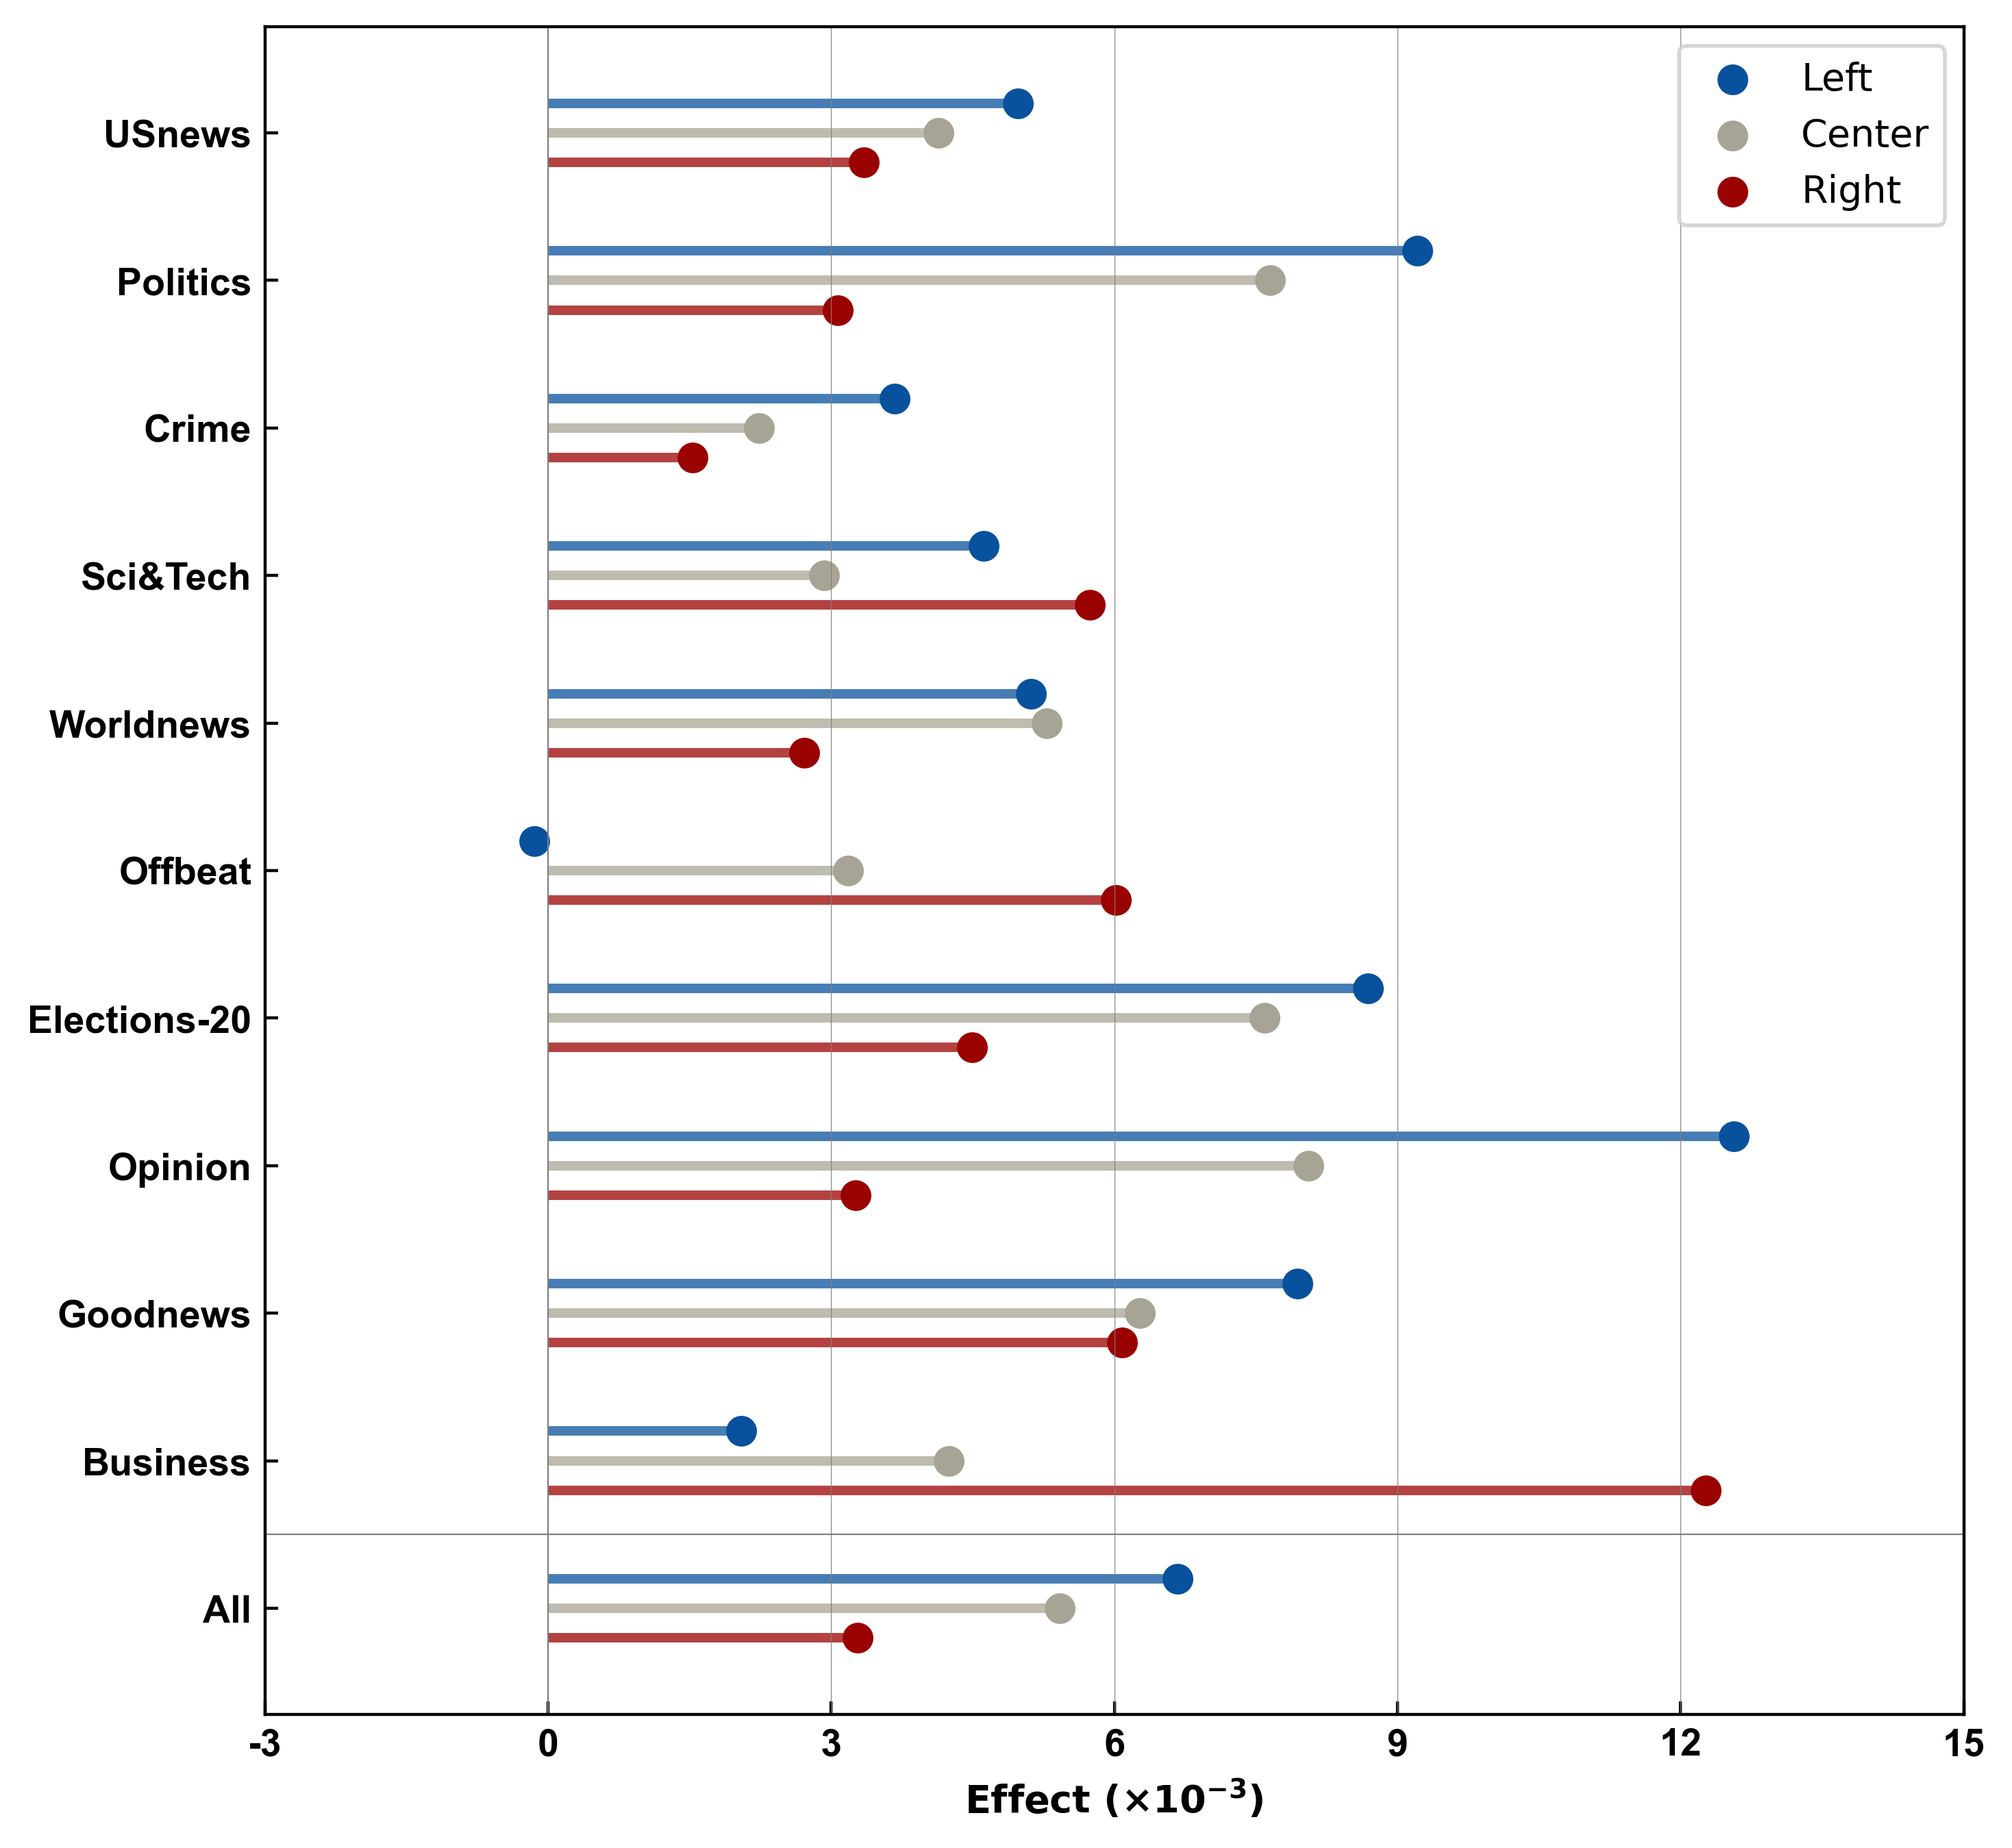

In [13]:
print('***** Wilcoxon-Mann-Whitney test *****')
pval_left_right = tuple(stats.mannwhitneyu(left_list, right_list, alternative='greater'))[1]
print('pval_left_right',pval_left_right)
pval_left_mid = tuple(stats.mannwhitneyu(left_list, mid_list, alternative='greater'))[1]
print('pval_left_mid',pval_left_mid)
pval_mid_right = tuple(stats.mannwhitneyu(mid_list, right_list, alternative='greater'))[1]
print('pval_mid_right',pval_mid_right)
print(np.median(left_list),np.median(mid_list),np.median(right_list))

fig, ax = plt.subplots(figsize=(8,8),dpi=400)
k = 10
sorted_indices = np.argsort(count_arr)[-k:]
left_effect_arr = ave_effect_arr[sorted_indices,0]
ax.hlines(y=[i+1.2 for i in range(k)], xmin=0, xmax=left_effect_arr, color='#08519c', alpha=0.75, ls='-', lw=2.5)
ax.scatter(left_effect_arr, [i+1.2 for i in range(k)], color='#08519c', s=50, alpha=1, label='Left')

mid_effect_arr = ave_effect_arr[sorted_indices,1]
ax.hlines(y=[i+1 for i in range(k)], xmin=0, xmax=mid_effect_arr, color='#a8a495', alpha=0.75, ls='-', lw=2.5)
ax.scatter(mid_effect_arr, [i+1 for i in range(k)], color='#a8a495', s=50, alpha=1, label='Center')

right_effect_arr = ave_effect_arr[sorted_indices,2]
ax.hlines(y=[i+0.8 for i in range(k)], xmin=0, xmax=right_effect_arr, color='#9a0200', alpha=0.75, ls='-', lw=2.5)
ax.scatter(right_effect_arr, [i+0.8 for i in range(k)], color='#9a0200', s=50, alpha=1, label='Right')
ax.legend(loc='upper right')

ax.hlines(y=0.2, xmin=0, xmax=np.mean(left_list), color='#08519c', alpha=0.75, ls='-', lw=2.5)
ax.scatter(np.mean(left_list), 0.2, color='#08519c', s=50, alpha=1)
ax.hlines(y=0, xmin=0, xmax=np.mean(mid_list), color='#a8a495', alpha=0.75, ls='-', lw=2.5)
ax.scatter(np.mean(mid_list), 0, color='#a8a495', s=50, alpha=1)
ax.hlines(y=-0.2, xmin=0, xmax=np.mean(right_list), color='#9a0200', alpha=0.75, ls='-', lw=2.5)
ax.scatter(np.mean(right_list), -0.2, color='#9a0200', s=50, alpha=1)

if mode == 'AllSides':  # -0.0015, 0.0134
    ax.set_xlim((-0.003,0.015))
    ax.set_xticks([-0.003,0,0.003,0.006,0.009,0.012,0.015],labels=['-3','0','3','6','9','12','15'])
    ax.hlines(y=0.5, xmin=-0.003, xmax=0.015, color='grey', ls='-', lw=0.4)
    for x in [0.003,0.006,0.009,0.012]:
        plt.axvline(x=x, c="grey", ls="-", lw=0.2)
    plt.axvline(x=0, c="grey", ls="-", lw=0.4)
elif mode == 'Ad Fontes Media': # -0.0041, 0.0225
    ax.set_xlim((0,0.015))
    ax.set_xticks([0,0.003,0.006,0.009,0.012,0.015],labels=['0','3','6','9','12','15'])
    ax.hlines(y=0.5, xmin=0, xmax=0.015, color='grey', ls='-', lw=0.4)
    for x in [0.003,0.006,0.009,0.012]:
        plt.axvline(x=x, c="grey", ls="-", lw=0.2)
    plt.axvline(x=0, c="grey", ls="-", lw=0.4)

ax.set_yticks([i for i in range(k+1)], ['All', 'Business', 'Goodnews', 'Opinion', 'Elections-20', 'Offbeat', 'Worldnews', 'Sci&Tech', 'Crime', 'Politics', 'USnews'])
ax.set_xlabel(r'Effect $\mathbf{(\times 10^{-3})}$', weight='bold')
plt.yticks(fontproperties='Arial', size=10, weight='bold')
plt.xticks(fontproperties='Arial', size=10, weight='bold')
plt.tick_params(direction='in')
# plt.savefig('../figures/news_subcategory_vs_leftright_{}.pdf'.format(suffix), dpi=400,bbox_inches='tight',pad_inches=0)
plt.show()

poli/nonpoli v.s. l/c/r (allsides)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from scipy import stats
import tqdm
import seaborn as sns


source_all = pd.read_csv('../data/source_all.csv')
mode = 'AllSides'   # 'Ad Fontes Media', 'AllSides
if mode == 'AllSides':
    poli_range = [-10,-1.5,1.5,10]
    suffix = 'allsides5'
    i2poli = source_all[source_all['poli5']<10]
    i2poli = i2poli[['i','poli5']]
    i2poli.rename(columns={'poli5':'poli'},inplace=True)
elif mode == 'Ad Fontes Media':
    poli_range = [-20,-8,8-0.001,30]
    suffix = 'adfontesmedia2'
    i2poli = source_all[source_all['poli2']<90]
    i2poli = i2poli[['i','poli2']]
    i2poli.rename(columns={'poli2':'poli'},inplace=True)

i2poli, source_all = i2poli.set_index('i'), source_all.set_index('i')
with open('../policy/get_effect/result/mind/policy_effect_o2j.pkl', 'rb') as file:
    peo2j = pickle.load(file)
news = pd.read_csv('../data/all_news.csv').set_index('i')

In [15]:
nv, nj = 2, 3
index = ['notpoli','poli']
df1 = pd.DataFrame(np.empty(nv*nj).reshape(nv,nj), columns=['{}'.format(i+1) for i in range(nj)], index=index)
df2 = pd.DataFrame(np.empty(nv*nj).reshape(nv,nj), columns=['{}'.format(i+1) for i in range(nj)], index=index)
mid_list, left_list, right_list = [], [], []

for a in tqdm.tqdm(index):
    for b in tqdm.tqdm(list(range(nj))):
        v_effect, count = [], 0
        for j in peo2j:
            if j not in i2poli.index or i2poli.loc[j,'poli'] <= poli_range[b] or i2poli.loc[j,'poli'] > poli_range[b+1] or source_all.loc[j,'click']<1:
                continue
            for v in peo2j[j]:
                if v not in news.index or news.loc[v,'p']!= a:
                    continue
                v_effect.append(peo2j[j][v])
                count += 1
        if len(v_effect) == 0:
            ave_effect = 0
        else:
            ave_effect = np.mean(v_effect)
        if b==0:
            left_list.extend(v_effect)
        elif b==2:
            right_list.extend(v_effect)
        else:
            mid_list.extend(v_effect)
        df1.loc[a,'{}'.format(b+1)] = ave_effect
        df2.loc[a,'{}'.format(b+1)] = count

h_all = (df1*df2).sum(axis=1) / df2.sum(axis=1)
v_all = (df1*df2).sum(axis=0) / df2.sum(axis=0)
all_effect = sum((df1*df2).values.reshape(-1)) / sum((df2).values.reshape(-1))
df1['all'] = h_all
df1.loc['all'] = v_all
df1.loc['all','all'] = all_effect
df1.columns = ['Left','Center','Right','All']
df1.index = ['Non-poli.','Poli.','All']

100%|██████████| 2/2 [00:05<00:00,  2.59s/it]


***** Wilcoxon-Mann-Whitney test *****
pval_left_right 7.522309197912379e-35
pval_left_mid 0.0009335425905899292
pval_mid_right 2.5160829835689584e-32
0.0028797789140336434 0.0022172870678555962 0.0004614488488762351


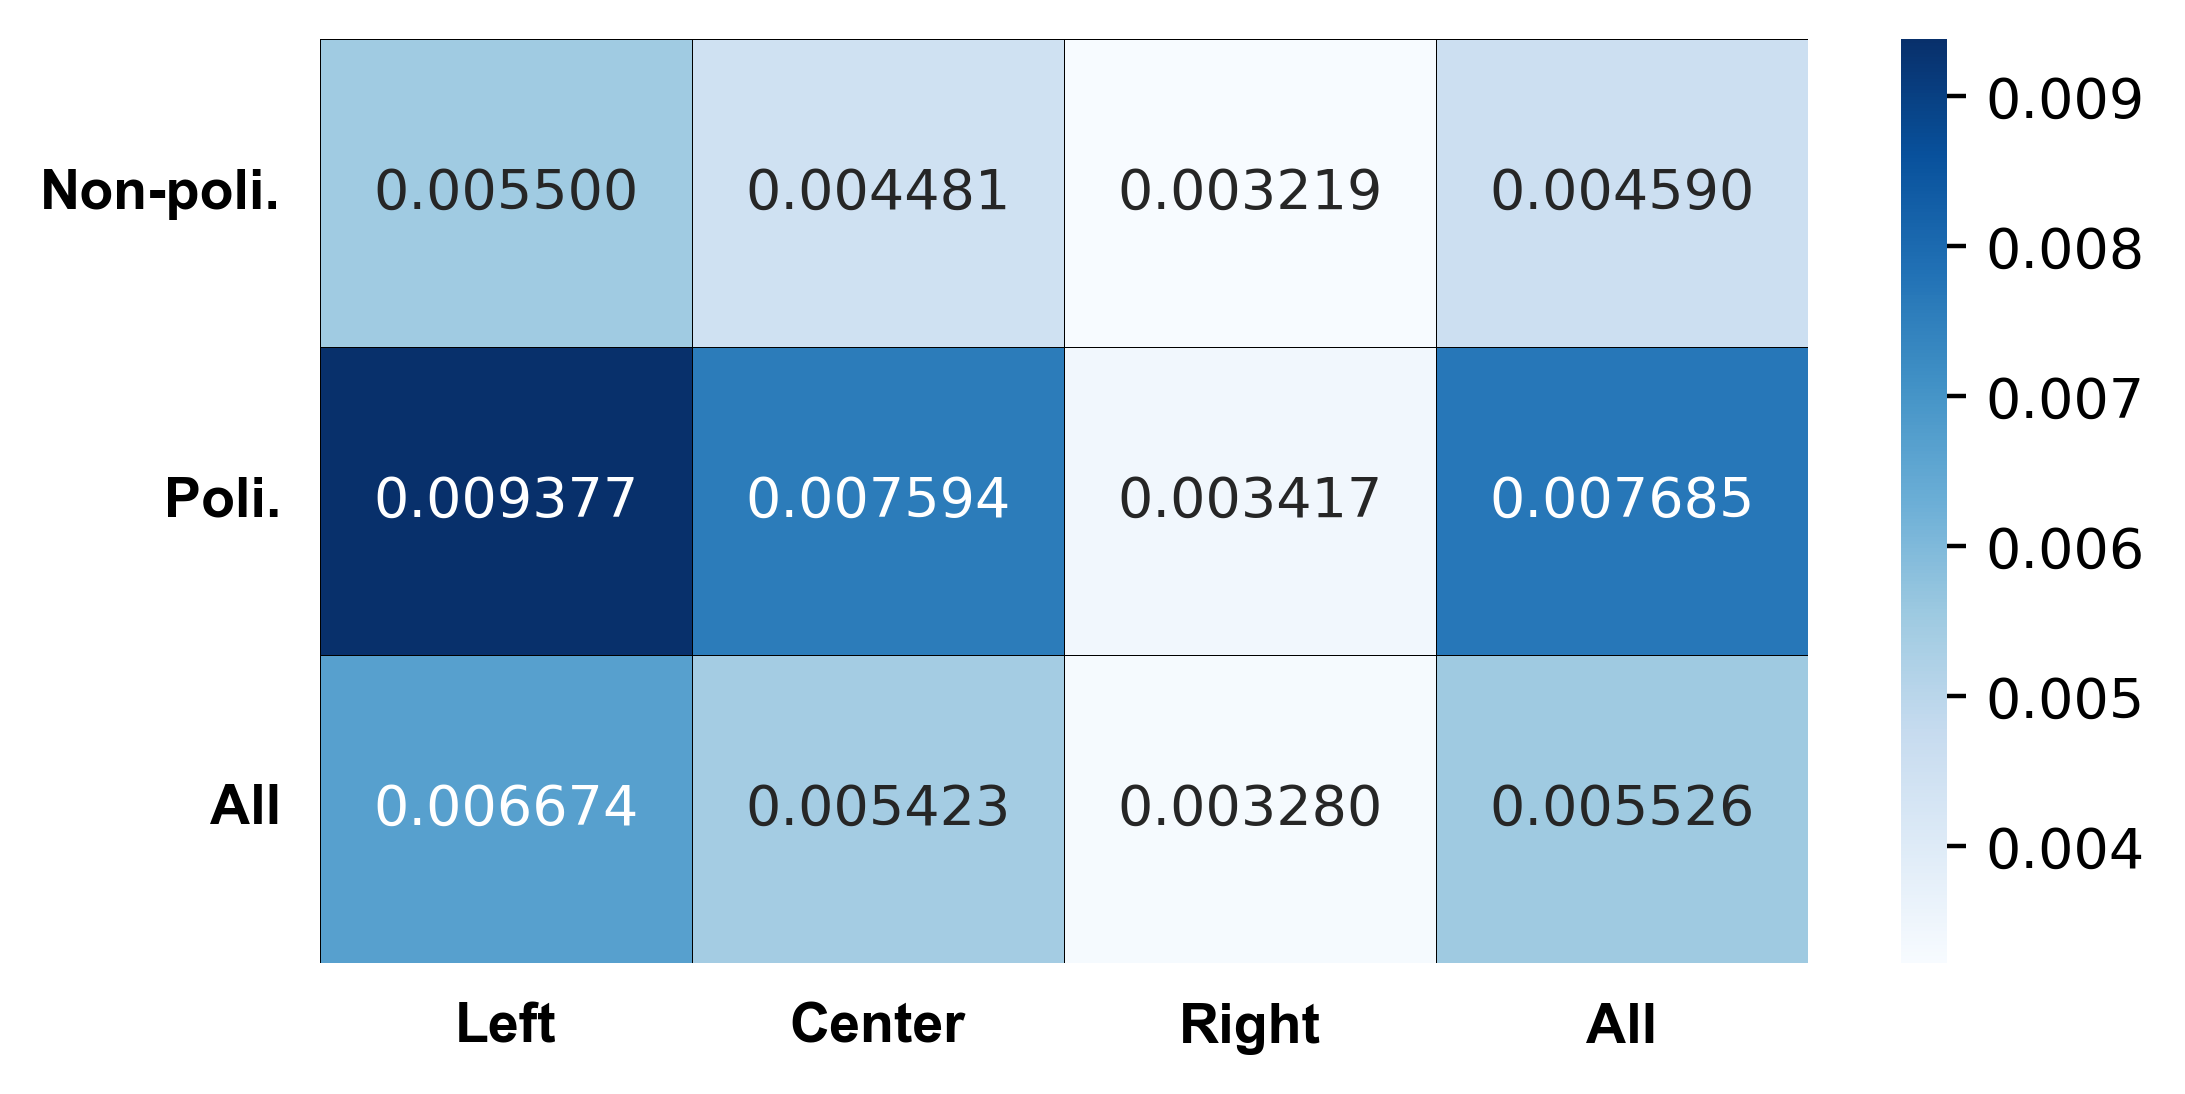

In [16]:
print('***** Wilcoxon-Mann-Whitney test *****')
pval_left_right = tuple(stats.mannwhitneyu(left_list, right_list, alternative='greater'))[1]
print('pval_left_right',pval_left_right)
pval_left_mid = tuple(stats.mannwhitneyu(left_list, mid_list, alternative='greater'))[1]
print('pval_left_mid',pval_left_mid)
pval_mid_right = tuple(stats.mannwhitneyu(mid_list, right_list, alternative='greater'))[1]
print('pval_mid_right',pval_mid_right)
print(np.median(left_list),np.median(mid_list),np.median(right_list))

plt.figure(figsize=(6,3),dpi=400)
sns.heatmap(df1, annot=df1.apply(lambda x: np.round(x,6)), fmt='.6f', cmap='Blues', linecolor='black', linewidths=0.1, annot_kws={"size": 10})
plt.yticks(fontproperties='Arial', size=10, weight='bold',rotation=0)
plt.xticks(fontproperties='Arial', size=10, weight='bold')
plt.tick_params(bottom=False,top=False,left=False,right=False)
# plt.savefig('../figures/poli_vs_leftright_{}.pdf'.format(suffix), dpi=400,bbox_inches='tight',pad_inches=0)
plt.show()

l/c/r v.s. l/c/r (allsides)

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from scipy import stats
import tqdm
import seaborn as sns


source_all = pd.read_csv('../data/source_all.csv')
mode = 'AllSides'   # 'Ad Fontes Media', 'AllSides
if mode == 'AllSides':
    poli_range = [-10,-1.5,1.5,10]
    suffix = 'allsides5'
    i2poli = source_all[source_all['poli5']<10]
    i2poli = i2poli[['i','poli5']]
    i2poli.rename(columns={'poli5':'poli'},inplace=True)
elif mode == 'Ad Fontes Media':
    poli_range = [-20,-8,8-0.001,30]
    suffix = 'adfontesmedia2'
    i2poli = source_all[source_all['poli2']<90]
    i2poli = i2poli[['i','poli2']]
    i2poli.rename(columns={'poli2':'poli'},inplace=True)

i2poli, source_all = i2poli.set_index('i'), source_all.set_index('i')
with open('../policy/get_effect/result/mind/policy_effect_o2j.pkl', 'rb') as file:
    peo2j = pickle.load(file)
news = pd.read_csv('../data/all_news.csv').set_index('i')

In [18]:
nv, nj = 3, 3
df1 = pd.DataFrame(np.empty(nv*nj).reshape(nv,nj), columns=['{}'.format(i+1) for i in range(nj)])
df2 = pd.DataFrame(np.empty(nv*nj).reshape(nv,nj), columns=['{}'.format(i+1) for i in range(nj)])
mid_list, left_list, right_list = [], [], []

for a in tqdm.tqdm(list(range(nv))):
    for b in tqdm.tqdm(list(range(nj))):
        v_effect, count = [], 0
        for j in peo2j:
            if j not in i2poli.index or i2poli.loc[j,'poli'] <= poli_range[b] or i2poli.loc[j,'poli'] > poli_range[b+1] or source_all.loc[j,'click']<1:
                continue
            for v in peo2j[j]:
                if v not in i2poli.index or i2poli.loc[v,'poli'] <= poli_range[a] or i2poli.loc[v,'poli'] > poli_range[a+1] or source_all.loc[v,'click']<1:
                    continue
                v_effect.append(peo2j[j][v])
                count += 1
        if len(v_effect) == 0:
            ave_effect = 0
        else:
            ave_effect = np.mean(v_effect)
        df1.loc[a,'{}'.format(b+1)] = ave_effect
        df2.loc[a,'{}'.format(b+1)] = count
        if b==0:
            left_list.extend(v_effect)
        elif b==2:
            right_list.extend(v_effect)
        else:
            mid_list.extend(v_effect)

h_all = (df1*df2).sum(axis=1)/ df2.sum(axis=1)
v_all = (df1*df2).sum(axis=0)/ df2.sum(axis=0)
all_effect = sum((df1*df2).values.reshape(-1)) / sum((df2).values.reshape(-1))
df1['all'] = h_all
df1.loc['all'] = v_all
df1.loc['all','all'] = all_effect
df1.columns = ['Left','Center','Right','All']
df1.index = ['Left','Center','Right','All']

100%|██████████| 3/3 [00:06<00:00,  2.06s/it]


***** Wilcoxon-Mann-Whitney test *****
pval_left_right 1.5433750246251501e-21
pval_left_mid 0.03177906241177423
pval_mid_right 4.070110362070365e-21
0.0053332310171507495 0.004730728756147596 0.0019420159341706129


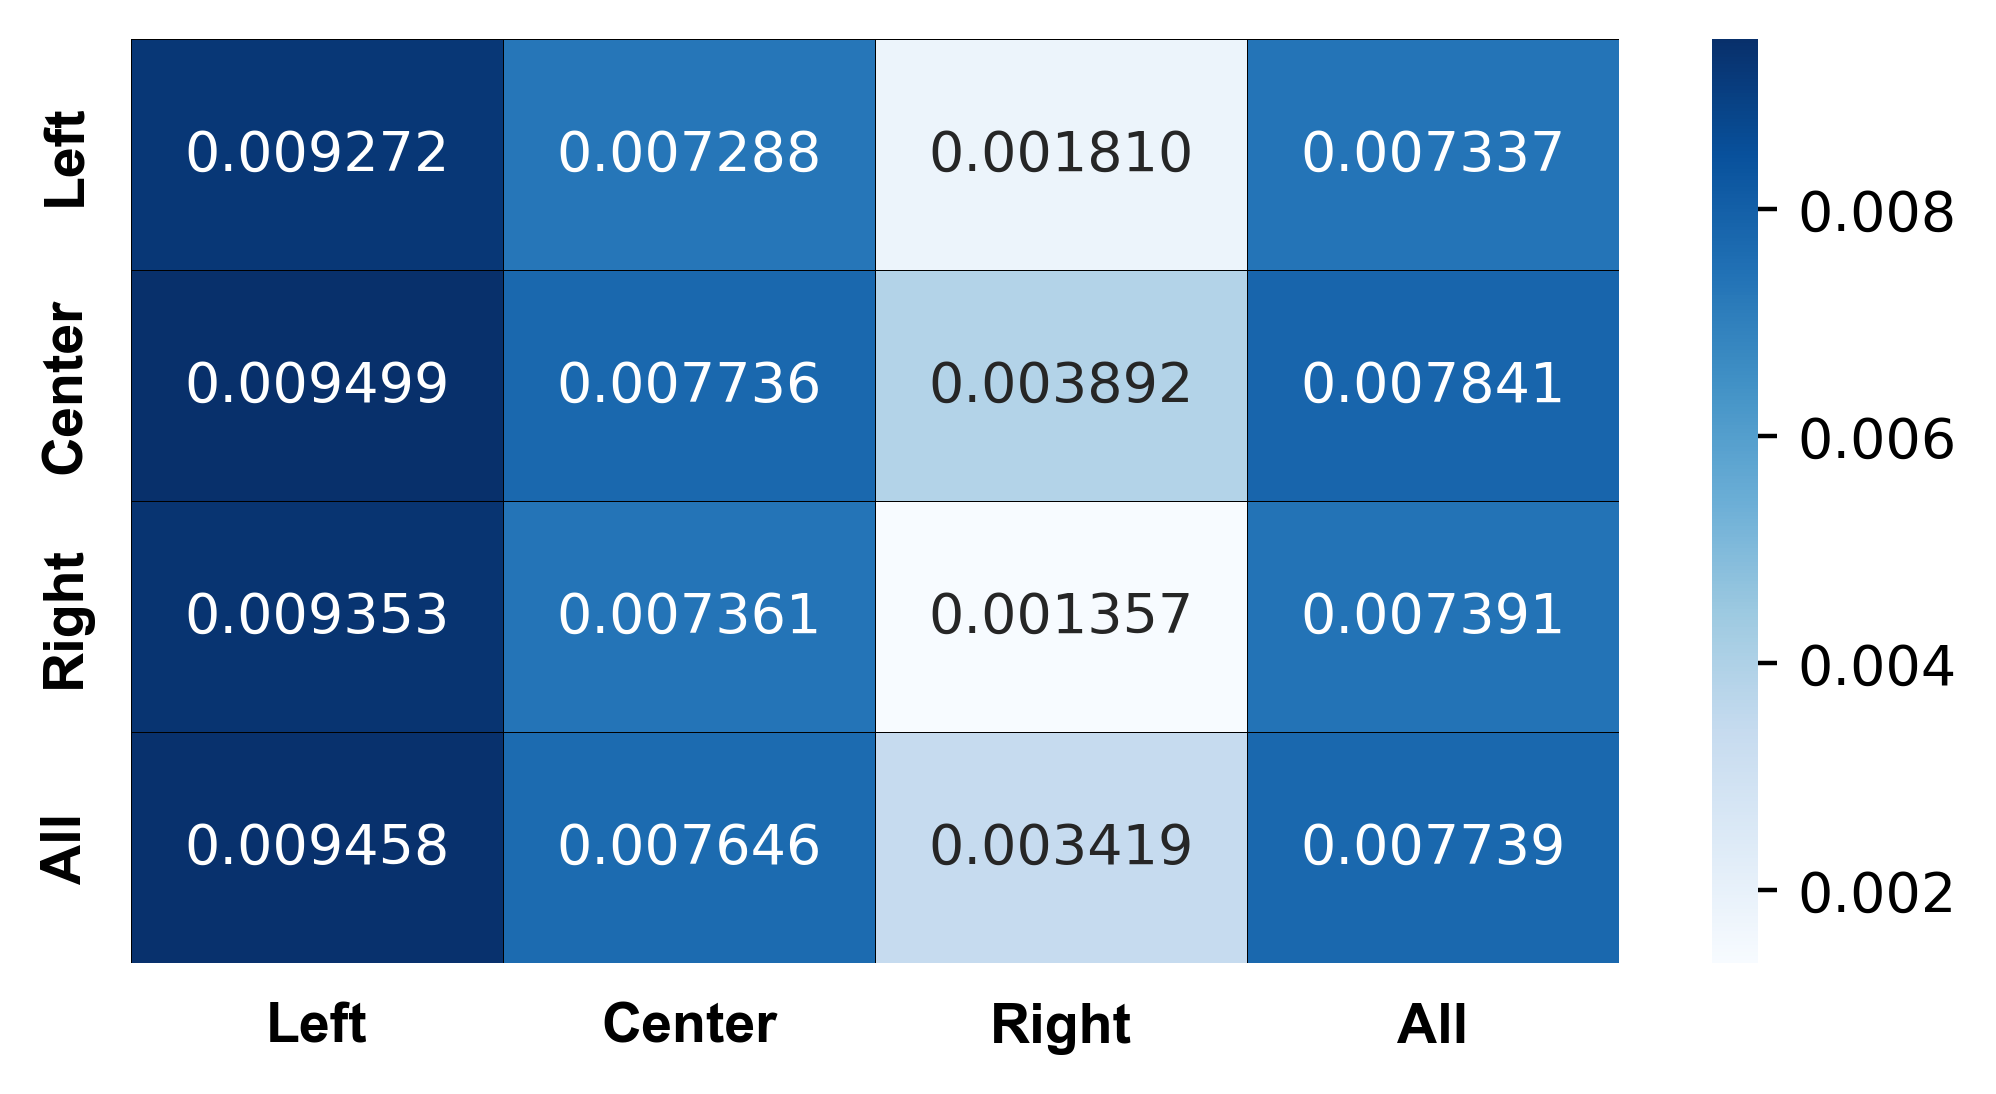

In [19]:
print('***** Wilcoxon-Mann-Whitney test *****')
pval_left_right = tuple(stats.mannwhitneyu(left_list, right_list, alternative='greater'))[1]
print('pval_left_right',pval_left_right)
pval_left_mid = tuple(stats.mannwhitneyu(left_list, mid_list, alternative='greater'))[1]
print('pval_left_mid',pval_left_mid)
pval_mid_right = tuple(stats.mannwhitneyu(mid_list, right_list, alternative='greater'))[1]
print('pval_mid_right',pval_mid_right)
print(np.median(left_list),np.median(mid_list),np.median(right_list))

plt.figure(figsize=(6,3),dpi=400)
sns.heatmap(df1, annot=df1.apply(lambda x: np.round(x,6)), fmt='.6f', cmap='Blues', linecolor='black', linewidths=0.1, annot_kws={"size": 10})
plt.yticks(fontproperties='Arial', size=10, weight='bold')
plt.xticks(fontproperties='Arial', size=10, weight='bold')
plt.tick_params(bottom=False,top=False,left=False,right=False)

# plt.savefig('../figures/leftright_vs_leftright_{}.pdf'.format(suffix), dpi=400,bbox_inches='tight',pad_inches=0)
plt.show()

In [20]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import tqdm
import seaborn as sns
from scipy import stats

with open('../policy/get_effect/result/mind/policy_effect_random_o2j1500.pkl', 'rb') as file:
    peo2jrandom = pickle.load(file)
with open('../data/i2cdf.pkl', 'rb') as file:
    i2c = pickle.load(file)
news = pd.read_csv('../data/all_news.csv').set_index('i')
nv,nj = 16,16

# ---------- 16x16 ---------- #

effect_arr, num_arr = np.zeros((16,16)), np.zeros((16,16))
for a in tqdm.tqdm(list(range(nv))):
    for b in tqdm.tqdm(list(range(nj))):
        v_effect, count = [], 0
        for j in peo2jrandom:
            if j not in i2c.index or i2c.loc[j][0]!= b:
                continue
            for v in peo2jrandom[j]:
                if v not in i2c.index or i2c.loc[v][0]!= a:
                    continue
                v_effect.append(peo2jrandom[j][v])
                count += 1
        if len(v_effect) == 0:
            ave_effect = 0
        else:
            ave_effect = float(sum(v_effect)) / len(v_effect)
        effect_arr[a,b] = ave_effect
        num_arr[a,b] = len(v_effect)

# ---------- 16x2 ---------- #

effect_16_2_arr, count_16_2_arr = np.zeros((16,2)), np.zeros((16,2))
for a in tqdm.tqdm(list(range(nv))):
    alist_effect, alist_count = [], []
    for b in tqdm.tqdm(['notpoli','poli']):
        v_effect, count = [], 0
        for j in peo2jrandom:
            if j not in news.index or news.loc[j,'p']!= b:
                continue
            for v in peo2jrandom[j]:
                if v not in i2c.index or i2c.loc[v][0]!= a:
                    continue
                v_effect.append(peo2jrandom[j][v])
                count += 1
        if len(v_effect) == 0:
            ave_effect = 0
        else:
            ave_effect = float(sum(v_effect)) / len(v_effect)
        alist_effect.append(ave_effect)
        alist_count.append(count)
    effect_16_2_arr[a] = np.array(alist_effect)
    count_16_2_arr[a] = np.array(alist_count)

# ---------- 2x16 ---------- #

effect_2_16_arr, count_2_16_arr = np.zeros((2,16)), np.zeros((2,16))
offset = 0
for a in tqdm.tqdm(['notpoli','poli']):
    alist_effect, alist_count = [], []
    for b in tqdm.tqdm(list(range(nv))):
        v_effect, count = [], 0
        for j in peo2jrandom:
            if j not in i2c.index or i2c.loc[j][0]!= b:
                continue
            for v in peo2jrandom[j]:
                if v not in news.index or news.loc[v,'p']!= a:
                    continue
                v_effect.append(peo2jrandom[j][v])
                count += 1
        if len(v_effect) == 0:
            ave_effect = 0
        else:
            ave_effect = float(sum(v_effect)) / len(v_effect)
        alist_effect.append(ave_effect)
        alist_count.append(count)
    effect_2_16_arr[offset] = np.array(alist_effect)
    count_2_16_arr[offset] = np.array(alist_count)
    offset += 1

# ---------- 2x2 ---------- #

effect_2_2_arr, count_2_2_arr = np.zeros((2,2)), np.zeros((2,2))
alist_effect, alist_count = [], []
for a in tqdm.tqdm(['notpoli','poli']):
    for b in tqdm.tqdm(['notpoli','poli']):
        v_effect, count = [], 0
        for j in peo2jrandom:
            if j not in news.index or news.loc[j,'p']!= b:
                continue
            for v in peo2jrandom[j]:
                if v not in news.index or news.loc[v,'p']!= a:
                    continue
                v_effect.append(peo2jrandom[j][v])
                count += 1
        if len(v_effect) == 0:
            ave_effect = 0
        else:
            ave_effect = float(sum(v_effect)) / len(v_effect)
        alist_effect.append(ave_effect)
        alist_count.append(count)

effect_2_2_arr = np.array(alist_effect).reshape((2,2))
count_2_2_arr = np.array(alist_count).reshape((2,2))
affecting_arr_16 = np.sum(effect_arr*num_arr,axis=1).squeeze() / np.sum(num_arr,axis=1).squeeze()
affected_arr_16 = np.sum(effect_arr*num_arr,axis=0).squeeze() / np.sum(num_arr,axis=0).squeeze()
affecting_arr_2 = np.sum(effect_2_16_arr*count_2_16_arr,axis=1).squeeze() / np.sum(count_2_16_arr,axis=1).squeeze()
affected_arr_2 = np.sum(effect_16_2_arr*count_16_2_arr,axis=0).squeeze() / np.sum(count_16_2_arr,axis=0).squeeze()

100%|██████████| 2/2 [00:01<00:00,  1.50it/s]
/tmp/ipykernel_64028/3474385605.py:112: RuntimeWarning: invalid value encountered in true_divide
  affected_arr_16 = np.sum(effect_arr*num_arr,axis=0).squeeze() / np.sum(num_arr,axis=0).squeeze()


<Figure size 640x480 with 0 Axes>

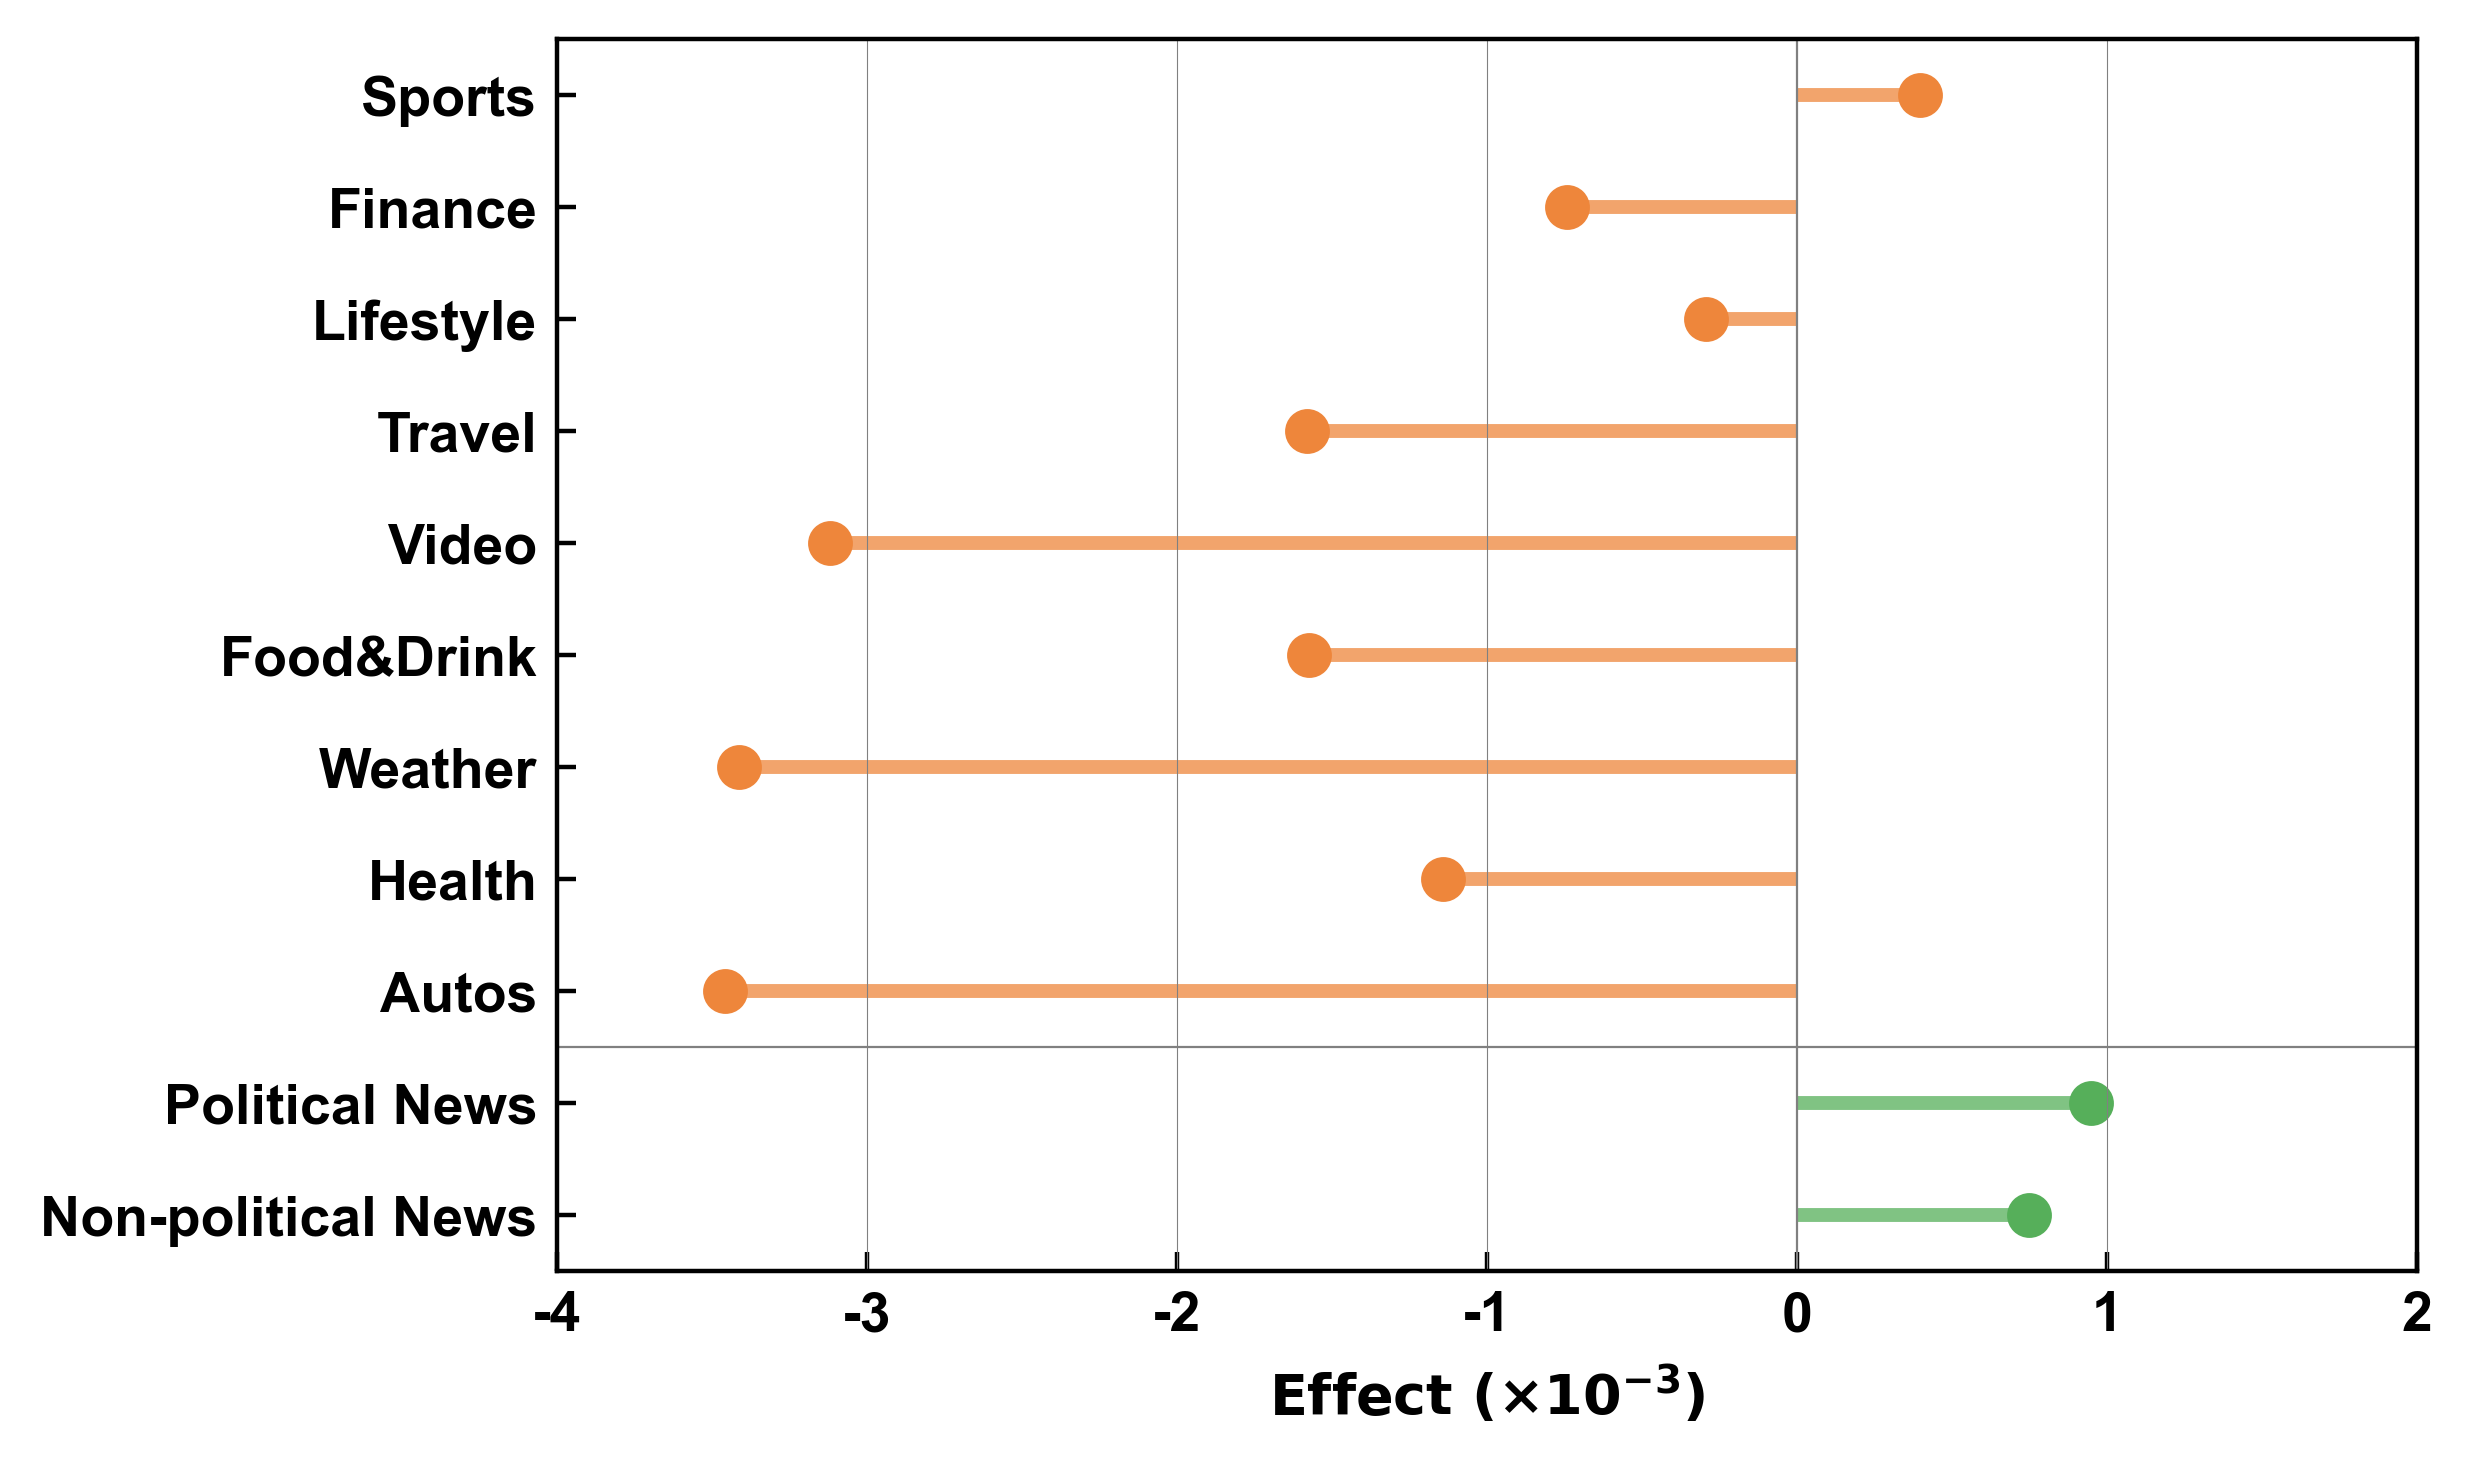

In [21]:
plt.figure()
fig, ax = plt.subplots(figsize=(6,4),dpi=400)

sorted_indices = np.array([3,1,9,5,12,6,0,8,7])
LABELS = np.array(['Lifestyle', 'Health', 'News', 'Autos', 'TV', 'Food&Drink', 'Travel', 'Sports', 'Finance', 'Weather', 'Movies', 'Entertainment', 'Video', 'Kids', 'Music', 'North America'])
affecting_arr = affecting_arr_16[sorted_indices]
ax.hlines(y=[i+2 for i in range(9)], xmin=0, xmax=affecting_arr, color='#EE863B', alpha=0.75, ls='-', lw=2.5)
ax.scatter(affecting_arr, [i+2 for i in range(9)], color='#EE863B', s=50, alpha=1)
ax.hlines(y=[0,1], xmin=0, xmax=affecting_arr_2, color='#56AF5A', alpha=0.75, ls='-', lw=2.5)
ax.scatter(affecting_arr_2, [0,1], color='#56AF5A', s=50, alpha=1)

ax.set_xlim((-0.004,0.002))
ax.set_xticks([-0.004,-0.003,-0.002,-0.001,0,0.001,0.002],labels=['-4','-3','-2','-1','0','1','2'])
ax.set_yticks([i for i in range(11)], ['Non-political News','Political News']+list(LABELS[sorted_indices]))
ax.hlines(y=1.5, xmin=-0.004, xmax=0.002, color='grey', ls='-', lw=0.4)
ax.set_xlabel(r'Effect $\mathbf{(\times 10^{-3})}$', weight='bold')

plt.yticks(fontproperties='Arial', size=10, weight='bold')
plt.xticks(fontproperties='Arial', size=10, weight='bold')
plt.tick_params(direction='in')

plt.axvline(x=0, c="grey", ls="-", lw=0.4)
plt.axvline(x=-0.003, c="grey", ls="-", lw=0.2)
plt.axvline(x=-0.002, c="grey", ls="-", lw=0.2)
plt.axvline(x=-0.001, c="grey", ls="-", lw=0.2)
plt.axvline(x=0.001, c="grey", ls="-", lw=0.2)

# plt.savefig('../figures/category_vs_allnews.pdf', dpi=400,bbox_inches='tight',pad_inches=0)
plt.show()

All categories v.s. l/c/r (Ad Fontes Media) (median)

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import tqdm
from scipy import stats
from collections import defaultdict

source_all = pd.read_csv('../data/source_all.csv')
mode = 'Ad Fontes Media'   # 'Ad Fontes Media', 'AllSides
poli_range = [-20,-8,8-0.001,30]
suffix = 'adfontesmedia2'
i2poli = source_all[source_all['poli2']<90]
i2poli = i2poli[['i','poli2']]
i2poli.rename(columns={'poli2':'poli'},inplace=True)

i2poli, source_all = i2poli.set_index('i'), source_all.set_index('i')
with open('../policy/get_effect/result/mind/policy_effect_o2j.pkl', 'rb') as file:
    peo2j = pickle.load(file)
news = pd.read_csv('../data/all_news.csv').set_index('i')

with open('../data/i2cdf.pkl', 'rb') as file:
    i2c = pickle.load(file)
cate_arr,cate_dict = i2c.values.squeeze(),defaultdict(int)
for cateid in cate_arr:
    cate_dict[cateid] += 1
VALUES = np.array(list(cate_dict.values()))
sorted_indices = np.argsort(VALUES)[-10:]
LABELS = np.array(['Lifestyle', 'Health', 'News', 'Autos', 'TV', 'Food&Drink', 'Travel', 'Sports', 'Finance', 'Weather', 'Movies', 'Entertainment', 'Video', 'Kids', 'Music', 'North America'])

In [23]:
ave_effect_arr, num_arr, left_list, right_list, mid_list = np.zeros((16,3)), np.zeros((16,3)), [], [], []
for a in tqdm.tqdm(list(range(16))):
    for b in [0,1,2]:
        v_effect = []
        for j in peo2j:
            if j not in i2poli.index or i2poli.loc[j,'poli'] <= poli_range[b] or i2poli.loc[j,'poli'] > poli_range[b+1] or source_all.loc[j,'click']<1:
                continue
            for v in peo2j[j]:
                if v not in i2c.index or i2c.loc[v][0]!= a:
                    continue
                v_effect.append(peo2j[j][v])
        ave_effect_arr[a,b], num_arr[a,b] = np.median(v_effect), len(v_effect)
        if b==0:
            left_list.extend(v_effect)
        elif b==2:
            right_list.extend(v_effect)
        else:
            mid_list.extend(v_effect)

100%|██████████| 16/16 [09:40<00:00, 36.28s/it]


***** Wilcoxon-Mann-Whitney test *****
pval_left_right 6.933416029964956e-28
pval_left_mid 1.0019133900420899e-60
pval_mid_right 0.006693446228323478
0.00012615729655119393 0.0 0.0


<Figure size 640x480 with 0 Axes>

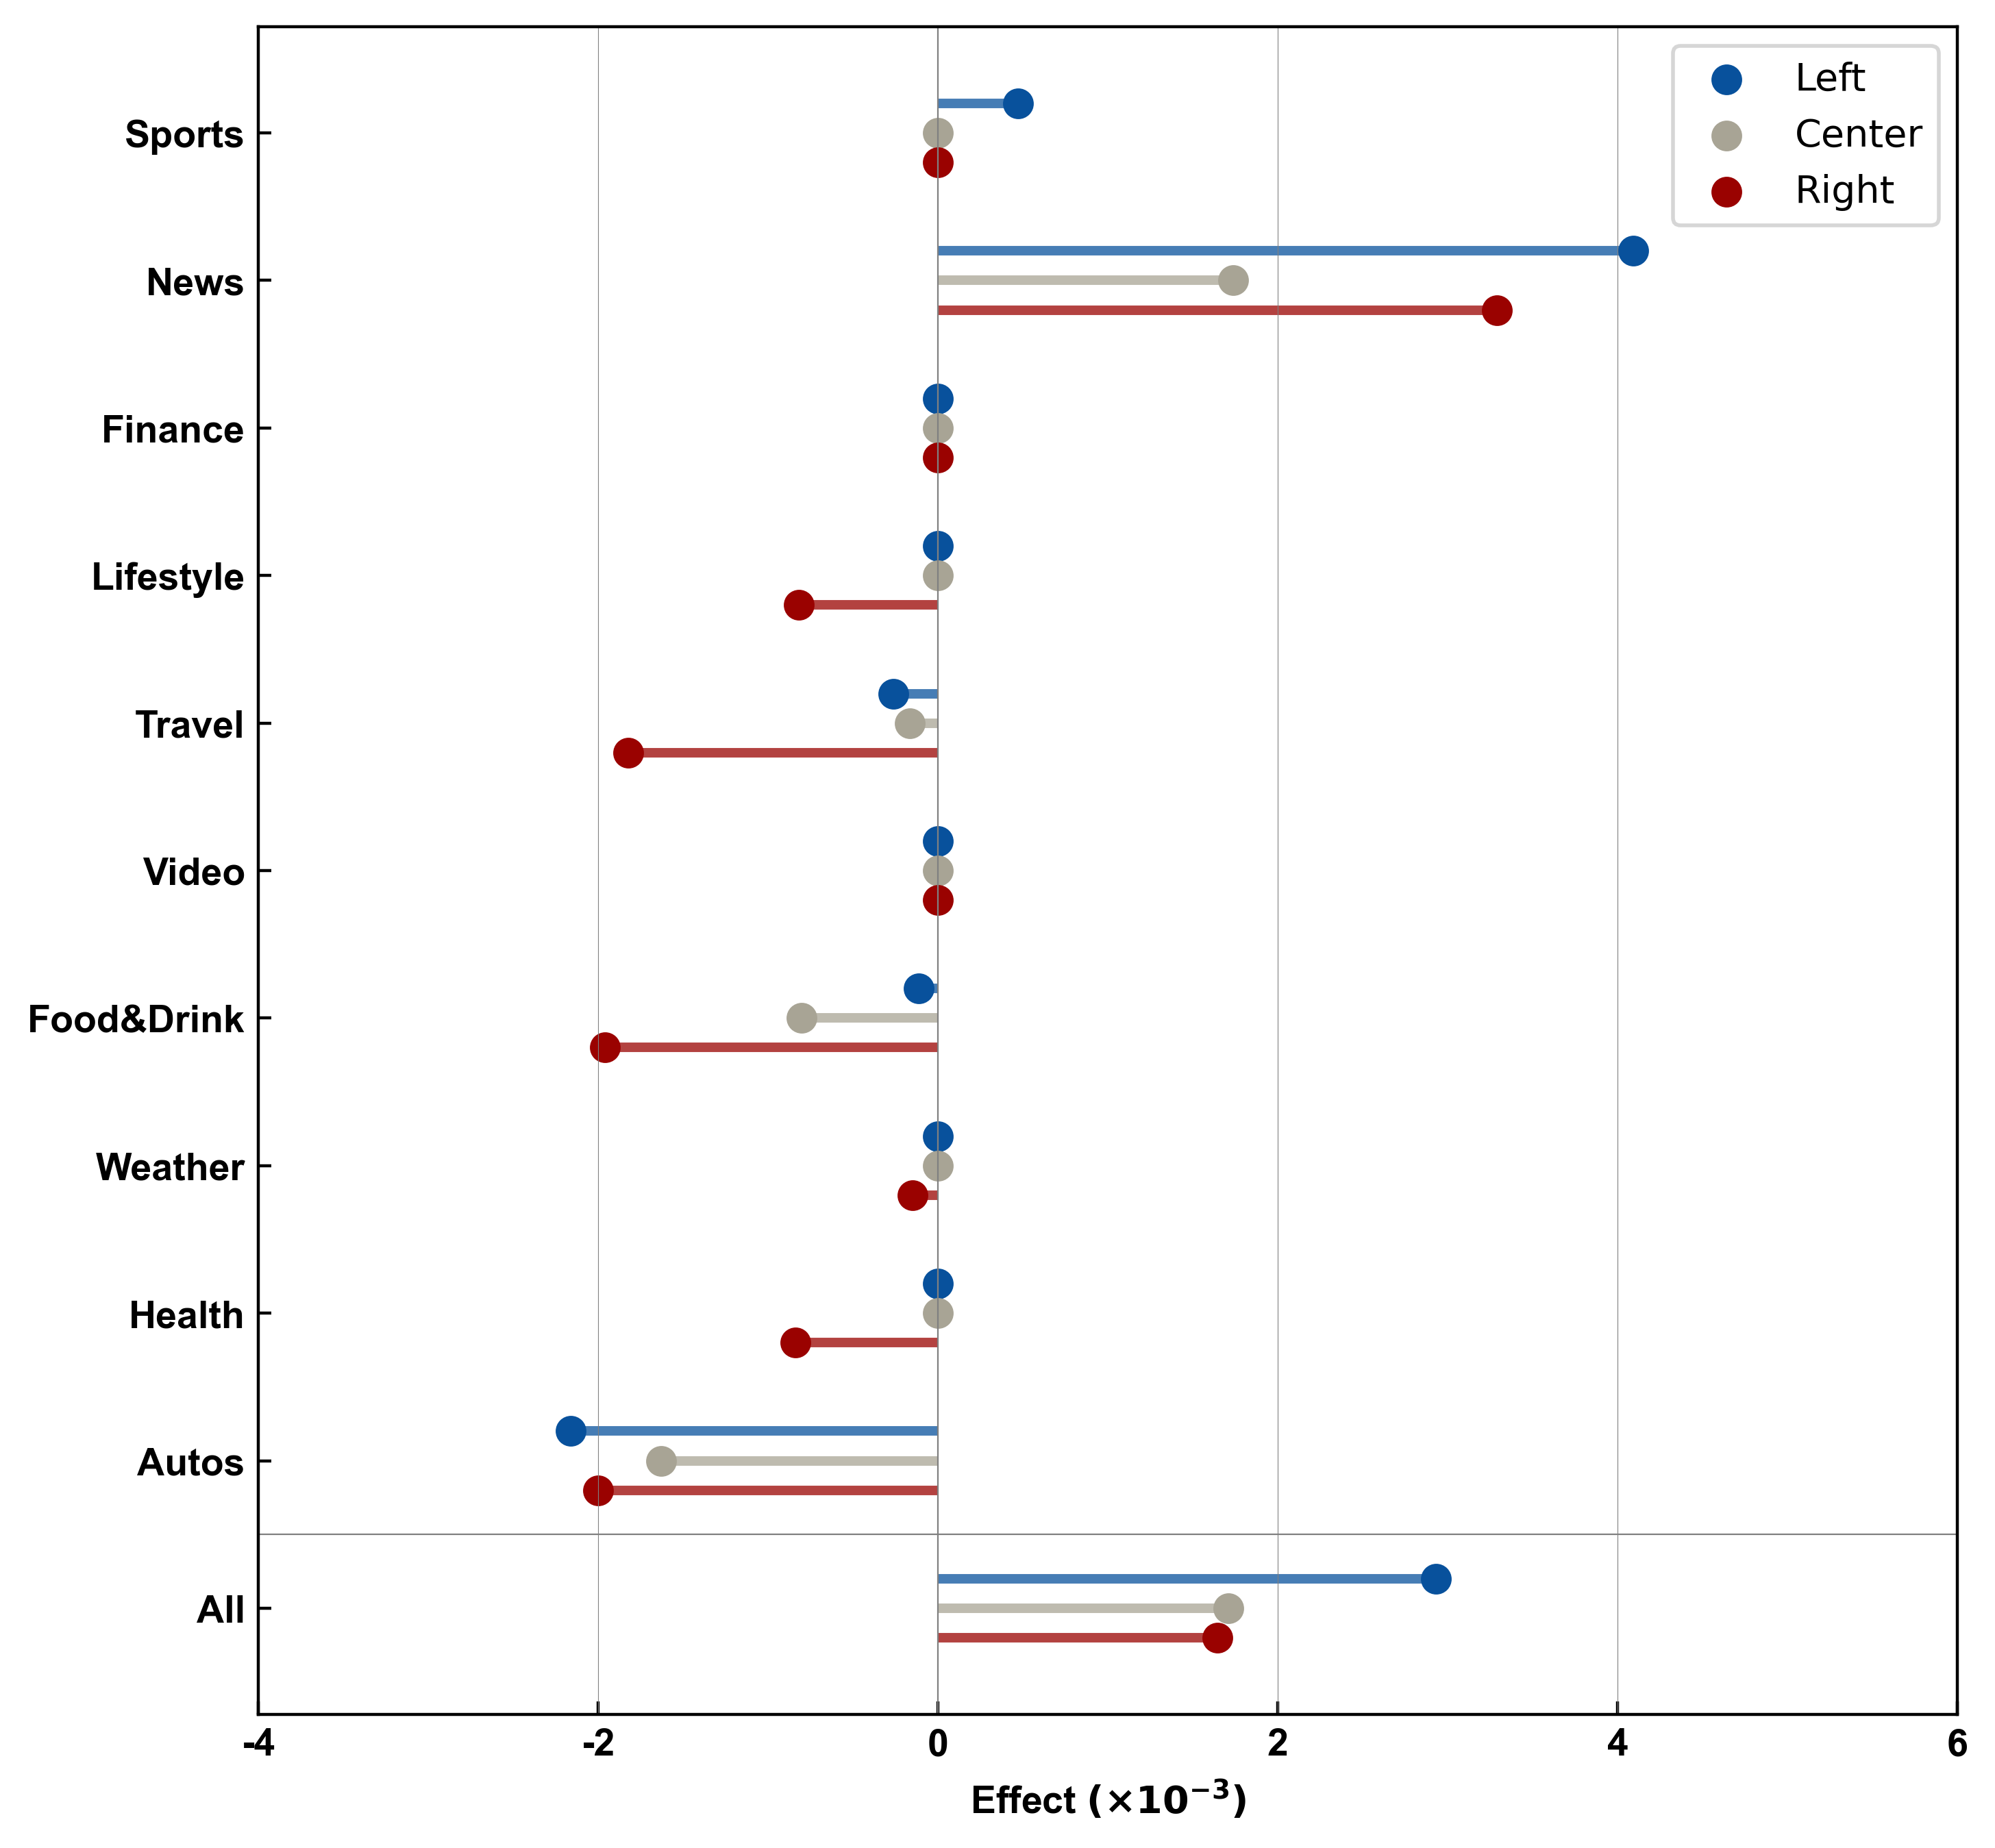

In [24]:
print('***** Wilcoxon-Mann-Whitney test *****')
pval_left_right = tuple(stats.mannwhitneyu(left_list, right_list, alternative='greater'))[1]
print('pval_left_right',pval_left_right)
pval_left_mid = tuple(stats.mannwhitneyu(left_list, mid_list, alternative='greater'))[1]
print('pval_left_mid',pval_left_mid)
pval_mid_right = tuple(stats.mannwhitneyu(mid_list, right_list, alternative='greater'))[1]
print('pval_mid_right',pval_mid_right)
print(np.median(left_list),np.median(mid_list),np.median(right_list))

plt.figure()
fig, ax = plt.subplots(figsize=(8,8),dpi=400)

left_effect_arr = ave_effect_arr[sorted_indices,0]
ax.hlines(y=[i+1.2 for i in range(10)], xmin=0, xmax=left_effect_arr, color='#08519c', alpha=0.75, ls='-', lw=2.5)
ax.scatter(left_effect_arr, [i+1.2 for i in range(10)], color='#08519c', s=50, alpha=1, label='Left')

mid_effect_arr = ave_effect_arr[sorted_indices,1]
ax.hlines(y=[i+1 for i in range(10)], xmin=0, xmax=mid_effect_arr, color='#a8a495', alpha=0.75, ls='-', lw=2.5)
ax.scatter(mid_effect_arr, [i+1 for i in range(10)], color='#a8a495', s=50, alpha=1, label='Center')

right_effect_arr = ave_effect_arr[sorted_indices,2]
ax.hlines(y=[i+0.8 for i in range(10)], xmin=0, xmax=right_effect_arr, color='#9a0200', alpha=0.75, ls='-', lw=2.5)
ax.scatter(right_effect_arr, [i+0.8 for i in range(10)], color='#9a0200', s=50, alpha=1, label='Right')
ax.legend(loc='upper right')

ax.hlines(y=0.2, xmin=0, xmax=np.mean(left_list), color='#08519c', alpha=0.75, ls='-', lw=2.5)
ax.scatter(np.mean(left_list), 0.2, color='#08519c', s=50, alpha=1)
ax.hlines(y=0, xmin=0, xmax=np.mean(mid_list), color='#a8a495', alpha=0.75, ls='-', lw=2.5)
ax.scatter(np.mean(mid_list), 0, color='#a8a495', s=50, alpha=1)
ax.hlines(y=-0.2, xmin=0, xmax=np.mean(right_list), color='#9a0200', alpha=0.75, ls='-', lw=2.5)
ax.scatter(np.mean(right_list), -0.2, color='#9a0200', s=50, alpha=1)

if mode == 'AllSides':
    ax.set_xlim((-0.009,0.009))
    ax.set_xticks(np.arange(-0.009,0.0091,0.003),labels=['-9','-6','-3','0','3','6','9'])
    ax.hlines(y=0.5, xmin=-0.009, xmax=0.009, color='grey', ls='-', lw=0.4)
    for x in [-0.006,-0.003,0.003,0.006]:
        plt.axvline(x=x, c="grey", ls="-", lw=0.2)
    plt.axvline(x=0, c="grey", ls="-", lw=0.4)
elif mode == 'Ad Fontes Media':
    ax.set_xlim((-0.004,0.006))
    ax.set_xticks(np.arange(-0.004,0.0061,0.002),labels=['-4','-2','0','2','4','6'])
    ax.hlines(y=0.5, xmin=-0.004, xmax=0.006, color='grey', ls='-', lw=0.4)
    for x in [-0.002,0.002,0.004]:
        plt.axvline(x=x, c="grey", ls="-", lw=0.2)
    plt.axvline(x=0, c="grey", ls="-", lw=0.4)

ax.set_yticks([i for i in range(11)], ['All']+list(LABELS[sorted_indices]))
ax.set_xlabel(r'Effect $\mathbf{(\times 10^{-3})}$', fontproperties='Arial', fontweight='bold')
plt.yticks(fontproperties='Arial', size=10, weight='bold')
plt.xticks(fontproperties='Arial', size=10, weight='bold')
plt.tick_params(direction='in')

# plt.savefig('../figures/category_vs_leftright_{}.pdf'.format(suffix), dpi=400,bbox_inches='tight',pad_inches=0)
plt.show()

News subcategories v.s. l/c/r (Ad Fontes)

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from scipy import stats

source_all = pd.read_csv('../data/source_all.csv')
mode = 'Ad Fontes Media'   # 'Ad Fontes Media', 'AllSides
poli_range = [-20,-8,8-0.001,30]
suffix = 'adfontesmedia2'
i2poli = source_all[source_all['poli2']<90]
i2poli = i2poli[['i','poli2']]
i2poli.rename(columns={'poli2':'poli'},inplace=True)

i2poli, source_all = i2poli.set_index('i'), source_all.set_index('i')
with open('../policy/get_effect/result/mind/policy_effect_o2j.pkl', 'rb') as file:
    peo2j = pickle.load(file)
news = pd.read_csv('../data/all_news.csv').set_index('i')

subcategory_list = list(news['subcategory'])
subcate_dict = {}
for subcate in subcategory_list:
    try:
        subcate_dict[subcate] += 1
    except:
        subcate_dict[subcate] = 1
subcate_arr, count_arr = np.array(list(subcate_dict.keys())), np.array(list(subcate_dict.values()))

In [26]:
ave_effect_arr, left_list, right_list, mid_list = np.zeros((28,3)), [], [], []
for a, cate in enumerate(subcate_arr):
    for b in [0,1,2]:
        v_effect, count = [], 0
        for j in peo2j:
            if j not in i2poli.index or i2poli.loc[j,'poli'] <= poli_range[b] or i2poli.loc[j,'poli'] > poli_range[b+1] or source_all.loc[j,'click']<1:
                continue
            for v in peo2j[j]:
                if v not in news.index or news.loc[v,'subcategory']!= cate:
                    continue
                v_effect.append(peo2j[j][v])
                count += 1
        if len(v_effect) != 0:
            ave_effect_arr[a,b] = np.median(v_effect)
        else:
            ave_effect_arr[a,b] = 0
        if b==0:
            left_list.extend(v_effect)
        elif b==2:
            right_list.extend(v_effect)
        else:
            mid_list.extend(v_effect)

***** Wilcoxon-Mann-Whitney test *****
pval_left_right 0.020655889836785297
pval_left_mid 1.516595305804582e-60
pval_mid_right 0.9999999999999928
0.004092043152834403 0.0017376911795516448 0.0032871269645064444


<Figure size 640x480 with 0 Axes>

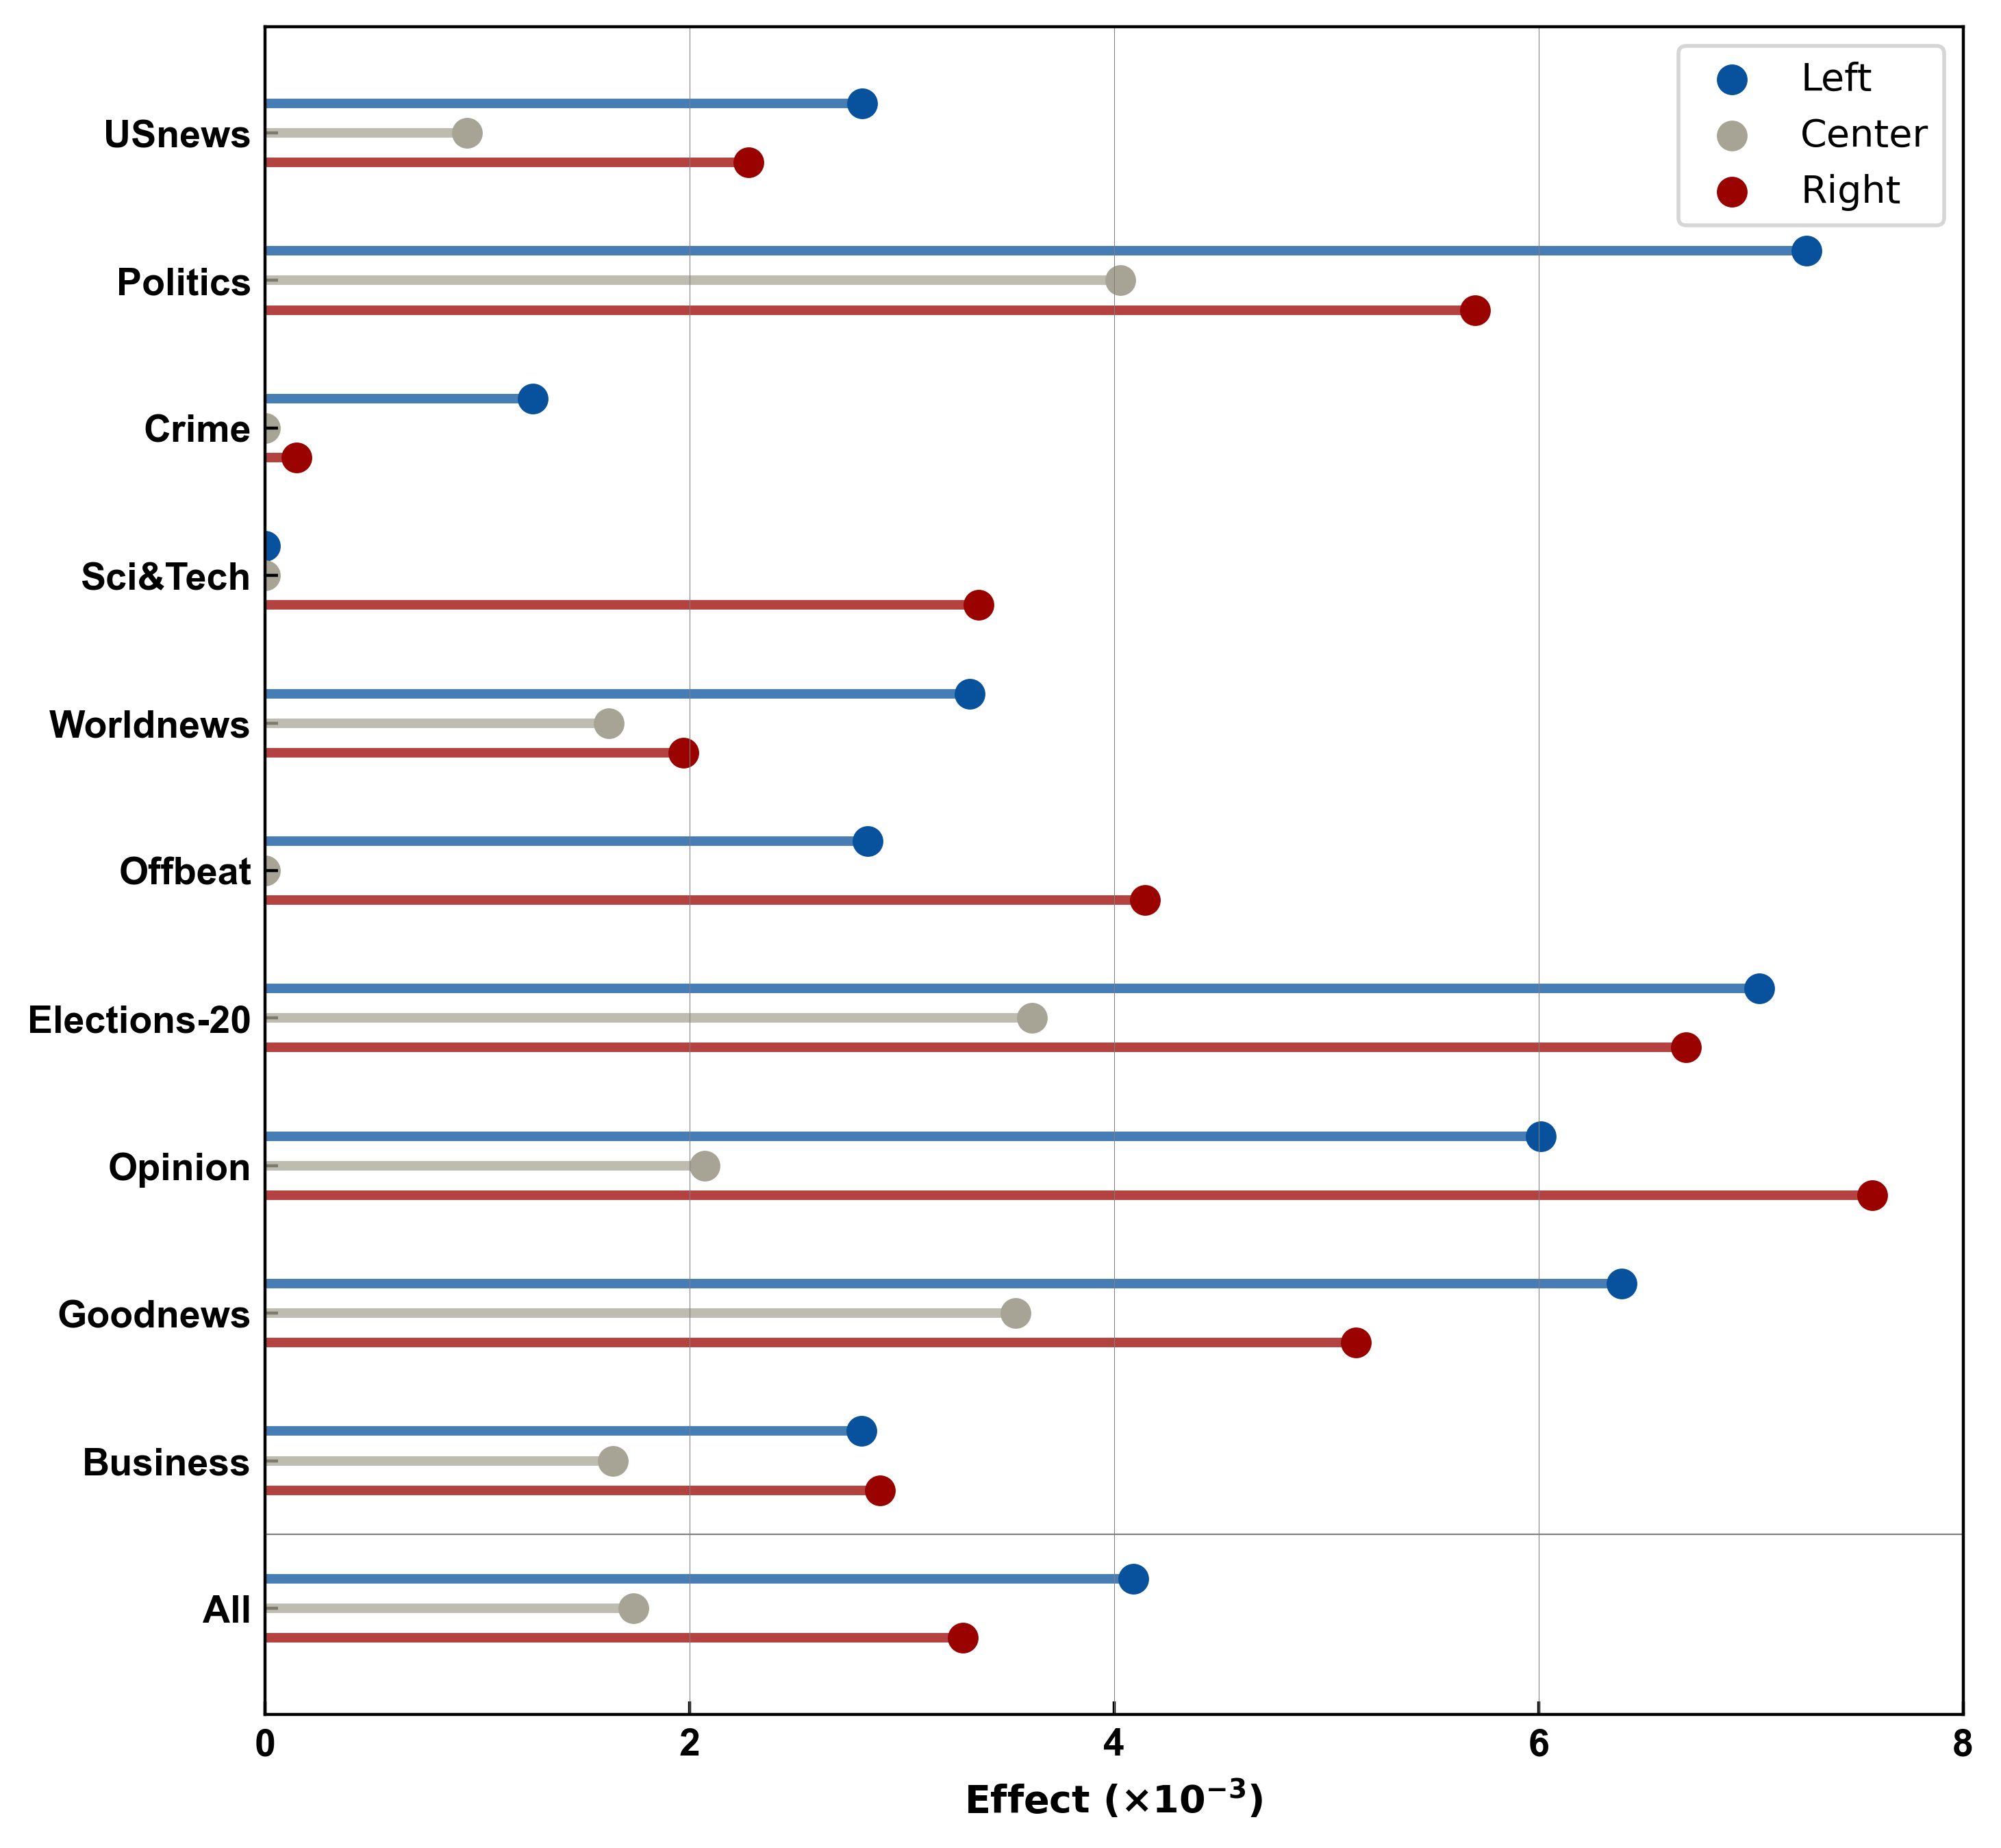

In [27]:
print('***** Wilcoxon-Mann-Whitney test *****')
pval_left_right = tuple(stats.mannwhitneyu(left_list, right_list, alternative='greater'))[1]
print('pval_left_right',pval_left_right)
pval_left_mid = tuple(stats.mannwhitneyu(left_list, mid_list, alternative='greater'))[1]
print('pval_left_mid',pval_left_mid)
pval_mid_right = tuple(stats.mannwhitneyu(mid_list, right_list, alternative='greater'))[1]
print('pval_mid_right',pval_mid_right)
print(np.median(left_list),np.median(mid_list),np.median(right_list))

plt.figure()
fig, ax = plt.subplots(figsize=(8,8),dpi=400)
k = 10
sorted_indices = np.argsort(count_arr)[-k:]
left_effect_arr = ave_effect_arr[sorted_indices,0]
ax.hlines(y=[i+1.2 for i in range(k)], xmin=0, xmax=left_effect_arr, color='#08519c', alpha=0.75, ls='-', lw=2.5)
ax.scatter(left_effect_arr, [i+1.2 for i in range(k)], color='#08519c', s=50, alpha=1, label='Left')

mid_effect_arr = ave_effect_arr[sorted_indices,1]
ax.hlines(y=[i+1 for i in range(k)], xmin=0, xmax=mid_effect_arr, color='#a8a495', alpha=0.75, ls='-', lw=2.5)
ax.scatter(mid_effect_arr, [i+1 for i in range(k)], color='#a8a495', s=50, alpha=1, label='Center')

right_effect_arr = ave_effect_arr[sorted_indices,2]
ax.hlines(y=[i+0.8 for i in range(k)], xmin=0, xmax=right_effect_arr, color='#9a0200', alpha=0.75, ls='-', lw=2.5)
ax.scatter(right_effect_arr, [i+0.8 for i in range(k)], color='#9a0200', s=50, alpha=1, label='Right')
ax.legend(loc='upper right')

ax.hlines(y=0.2, xmin=0, xmax=np.median(left_list), color='#08519c', alpha=0.75, ls='-', lw=2.5)
ax.scatter(np.median(left_list), 0.2, color='#08519c', s=50, alpha=1)
ax.hlines(y=0, xmin=0, xmax=np.median(mid_list), color='#a8a495', alpha=0.75, ls='-', lw=2.5)
ax.scatter(np.median(mid_list), 0, color='#a8a495', s=50, alpha=1)
ax.hlines(y=-0.2, xmin=0, xmax=np.median(right_list), color='#9a0200', alpha=0.75, ls='-', lw=2.5)
ax.scatter(np.median(right_list), -0.2, color='#9a0200', s=50, alpha=1)

# [-8,8]
ax.set_xlim((0,0.008))
ax.set_xticks([0,0.002,0.004,0.006,0.008],labels=['0','2','4','6','8'])
ax.hlines(y=0.5, xmin=0, xmax=0.008, color='grey', ls='-', lw=0.4)
for x in [0.002,0.004,0.006]:
    plt.axvline(x=x, c="grey", ls="-", lw=0.2)
plt.axvline(x=0, c="grey", ls="-", lw=0.4)

ax.set_yticks([i for i in range(k+1)], ['All', 'Business', 'Goodnews', 'Opinion', 'Elections-20', 'Offbeat', 'Worldnews', 'Sci&Tech', 'Crime', 'Politics', 'USnews'])
ax.set_xlabel(r'Effect $\mathbf{(\times 10^{-3})}$', weight='bold')

plt.yticks(fontproperties='Arial', size=10, weight='bold')
plt.xticks(fontproperties='Arial', size=10, weight='bold')
plt.tick_params(direction='in')
# plt.savefig('../figures/news_subcategory_vs_leftright_{}.pdf'.format(suffix), dpi=400,bbox_inches='tight',pad_inches=0)
plt.show()

poli/nonpoli v.s. l/c/r (ad Fontes)

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from scipy import stats
import tqdm
import seaborn as sns


source_all = pd.read_csv('../data/source_all.csv')
mode = 'Ad Fontes Media'   # 'Ad Fontes Media', 'AllSides
poli_range = [-20,-8,8-0.001,30]
suffix = 'adfontesmedia2'
i2poli = source_all[source_all['poli2']<90]
i2poli = i2poli[['i','poli2']]
i2poli.rename(columns={'poli2':'poli'},inplace=True)

i2poli, source_all = i2poli.set_index('i'), source_all.set_index('i')
with open('../policy/get_effect/result/mind/policy_effect_o2j.pkl', 'rb') as file:
    peo2j = pickle.load(file)
news = pd.read_csv('../data/all_news.csv').set_index('i')

In [29]:
nv, nj = 2, 3
index = ['notpoli','poli']
df1 = pd.DataFrame(np.empty(nv*nj).reshape(nv,nj), columns=['{}'.format(i+1) for i in range(nj)], index=index)
df2 = pd.DataFrame(columns=['{}'.format(i+1) for i in range(nj)], index=index)
mid_list, left_list, right_list, all_list = [], [], [], []

for a in tqdm.tqdm(index):
    for b in tqdm.tqdm(list(range(nj))):
        v_effect, count = [], 0
        for j in peo2j:
            if j not in i2poli.index or i2poli.loc[j,'poli'] <= poli_range[b] or i2poli.loc[j,'poli'] > poli_range[b+1] or source_all.loc[j,'click']<1:
                continue
            for v in peo2j[j]:
                if v not in news.index or news.loc[v,'p']!= a:
                    continue
                v_effect.append(peo2j[j][v])
                count += 1
        if len(v_effect) == 0:
            ave_effect = 0
        else:
            ave_effect = np.median(v_effect)
        if b==0:
            left_list.extend(v_effect)
        elif b==2:
            right_list.extend(v_effect)
        else:
            mid_list.extend(v_effect)
        df1.loc[a,'{}'.format(b+1)] = ave_effect
        df2.loc[a,'{}'.format(b+1)] = v_effect
        all_list += v_effect

h_all = [np.median(df2.loc[v,'1']+df2.loc[v,'2']+df2.loc[v,'3']) for v in index]
v_all = [np.median(df2.loc['notpoli','{}'.format(j+1)]+df2.loc['poli','{}'.format(j+1)]) for j in range(nj)]
all_effect = np.median(all_list)

df1['all'] = h_all
df1.loc['all'] = v_all+[0]
df1.loc['all','all'] = all_effect
df1.columns = ['Left','Center','Right','All']
# df1.index = ['Non-political','Political','All']
df1.index = ['Non-poli.','Poli.','All']

100%|██████████| 2/2 [00:05<00:00,  2.57s/it]


***** Wilcoxon-Mann-Whitney test *****
pval_left_right 0.020655889836785297
pval_left_mid 1.516595305804582e-60
pval_mid_right 0.9999999999999928
0.004092043152834403 0.0017376911795516448 0.0032871269645064444


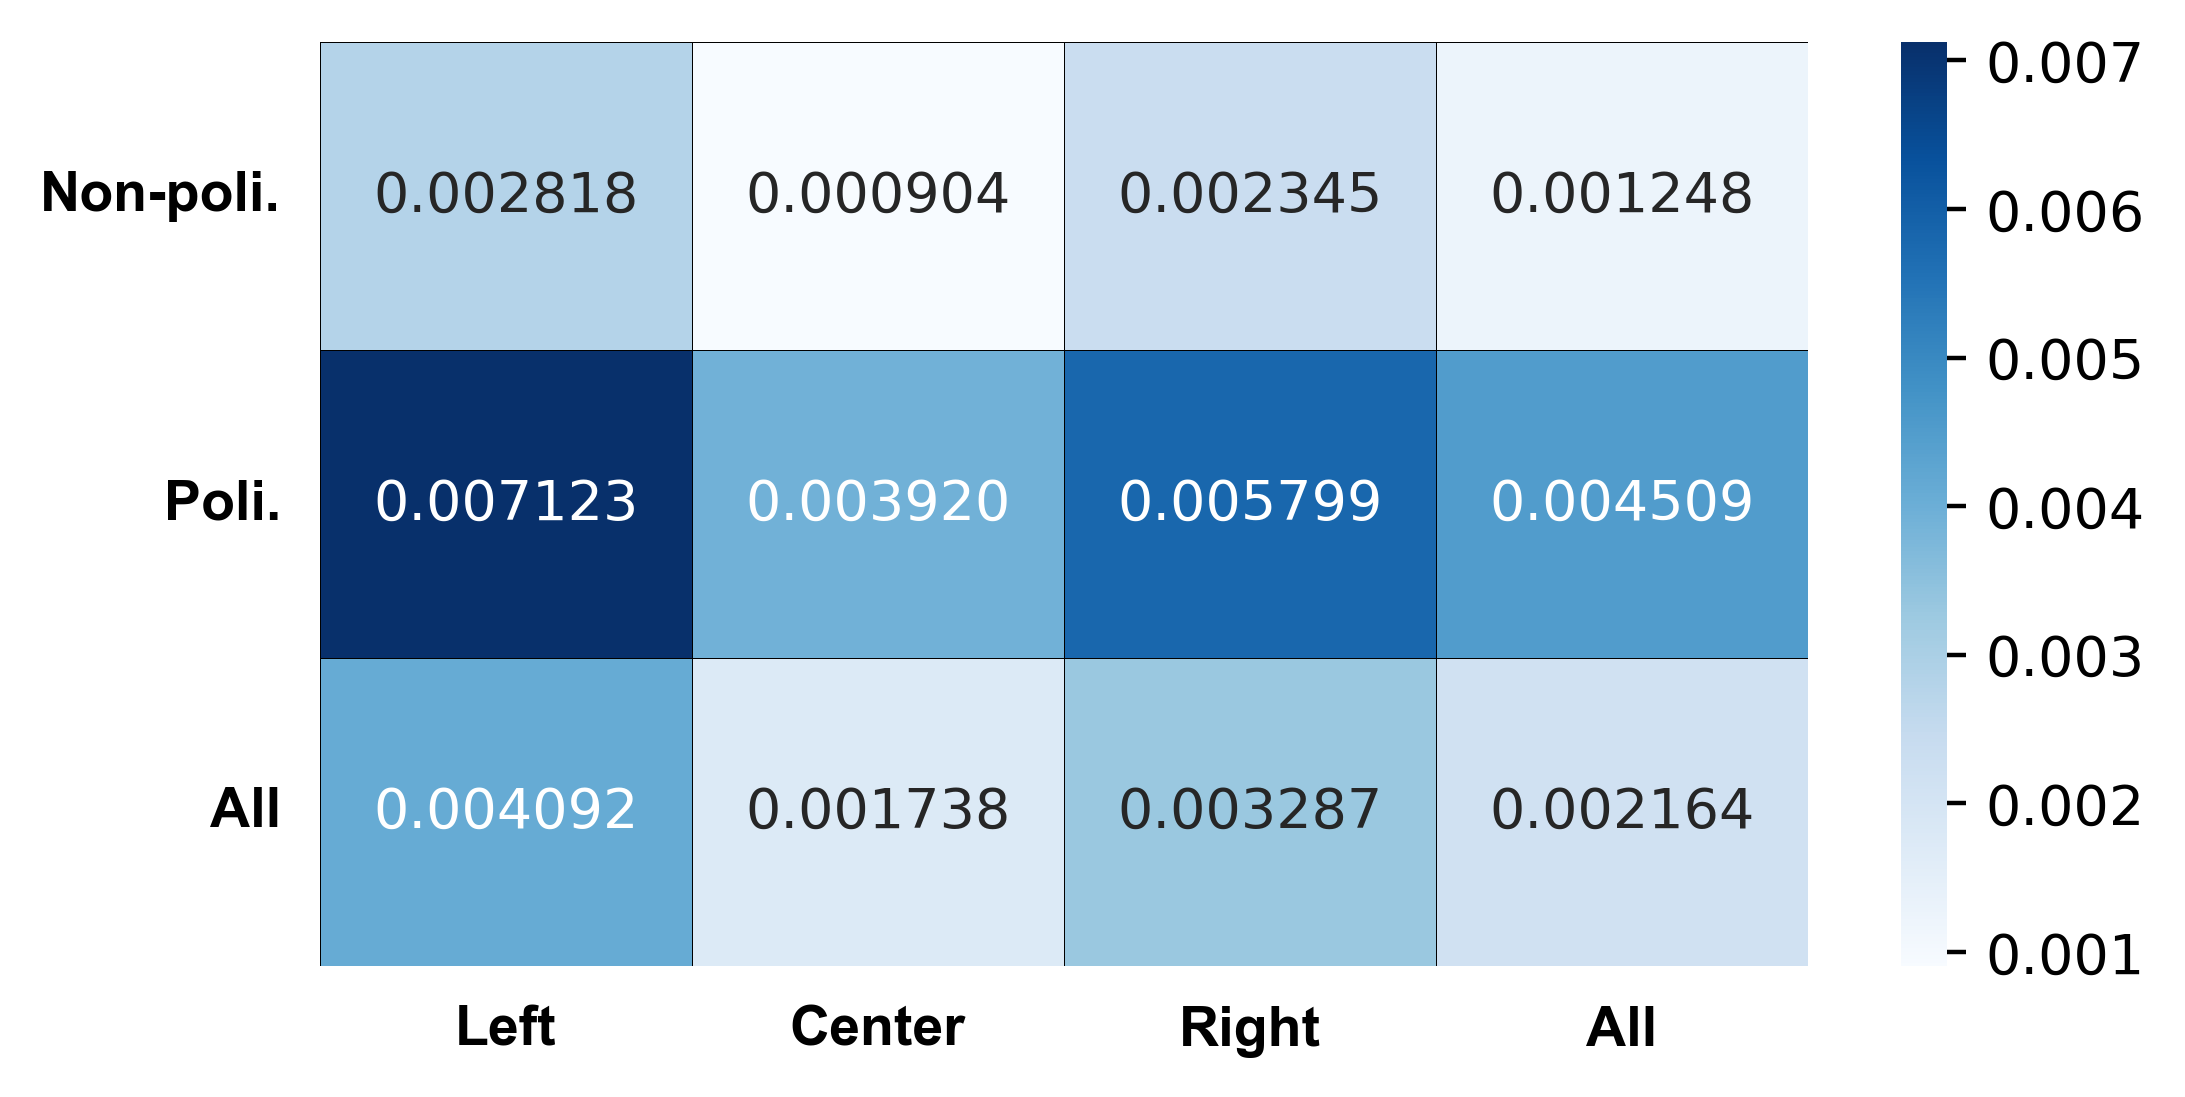

In [30]:
print('***** Wilcoxon-Mann-Whitney test *****')
pval_left_right = tuple(stats.mannwhitneyu(left_list, right_list, alternative='greater'))[1]
print('pval_left_right',pval_left_right)
pval_left_mid = tuple(stats.mannwhitneyu(left_list, mid_list, alternative='greater'))[1]
print('pval_left_mid',pval_left_mid)
pval_mid_right = tuple(stats.mannwhitneyu(mid_list, right_list, alternative='greater'))[1]
print('pval_mid_right',pval_mid_right)
print(np.median(left_list),np.median(mid_list),np.median(right_list))

#5154A6','#56AF5A' #EE863B
plt.figure(figsize=(6,3),dpi=400)
sns.heatmap(df1, annot=df1.apply(lambda x: np.round(x,6)), fmt='.6f', cmap='Blues', linecolor='black', linewidths=0.1, annot_kws={"size": 10})

plt.yticks(fontproperties='Arial', size=10, weight='bold',rotation=0)
plt.xticks(fontproperties='Arial', size=10, weight='bold')
plt.tick_params(bottom=False,top=False,left=False,right=False)
# plt.savefig('../figures/poli_vs_leftright_{}.pdf'.format(suffix), dpi=400,bbox_inches='tight',pad_inches=0)
plt.show()

l/c/r v.s. l/c/r (Ad Fontes)

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from scipy import stats
import tqdm
import seaborn as sns


source_all = pd.read_csv('../data/source_all.csv')
mode = 'Ad Fontes Media'   # 'Ad Fontes Media', 'AllSides
poli_range = [-20,-8,8-0.001,30]
suffix = 'adfontesmedia2'
i2poli = source_all[source_all['poli2']<90]
i2poli = i2poli[['i','poli2']]
i2poli.rename(columns={'poli2':'poli'},inplace=True)

i2poli, source_all = i2poli.set_index('i'), source_all.set_index('i')
with open('../policy/get_effect/result/mind/policy_effect_o2j.pkl', 'rb') as file:
    peo2j = pickle.load(file)
news = pd.read_csv('../data/all_news.csv').set_index('i')

In [32]:
nv, nj = 3, 3
df1 = pd.DataFrame(np.empty(nv*nj).reshape(nv,nj), columns=['{}'.format(i+1) for i in range(nj)])
df2 = pd.DataFrame(columns=['{}'.format(i+1) for i in range(nj)])
mid_list, left_list, right_list, all_list = [], [], [], []

for a in tqdm.tqdm(list(range(nv))):
    for b in tqdm.tqdm(list(range(nj))):
        v_effect, count = [], 0
        for j in peo2j:
            if j not in i2poli.index or i2poli.loc[j,'poli'] <= poli_range[b] or i2poli.loc[j,'poli'] > poli_range[b+1] or source_all.loc[j,'click']<1:
                continue
            for v in peo2j[j]:
                if v not in i2poli.index or i2poli.loc[v,'poli'] <= poli_range[a] or i2poli.loc[v,'poli'] > poli_range[a+1] or source_all.loc[v,'click']<1:
                    continue
                v_effect.append(peo2j[j][v])
                count += 1
        if len(v_effect) == 0:
            ave_effect = 0
        else:
            ave_effect = np.median(v_effect)
        df1.loc[a,'{}'.format(b+1)] = ave_effect
        df2.loc[a,'{}'.format(b+1)] = v_effect
        all_list += v_effect
        if b==0:
            left_list.extend(v_effect)
        elif b==2:
            right_list.extend(v_effect)
        else:
            mid_list.extend(v_effect)

h_all = [np.median(df2.loc[v,'1']+df2.loc[v,'2']+df2.loc[v,'3']) for v in range(nv)]
v_all = [np.median(df2.loc[0,'{}'.format(j+1)]+df2.loc[1,'{}'.format(j+1)]+df2.loc[2,'{}'.format(j+1)]) for j in range(nj)]
all_effect = np.median(all_list)
df1['all'] = h_all
df1.loc['all'] = v_all+[0]
df1.loc['all','all'] = all_effect
df1.columns = ['Left','Center','Right','All']
df1.index = ['Left','Center','Right','All']

100%|██████████| 3/3 [00:05<00:00,  1.91s/it]


***** Wilcoxon-Mann-Whitney test *****
pval_left_right 0.010159060356483517
pval_left_mid 9.243722441767955e-29
pval_mid_right 0.9999896073074376
0.0071485350897115595 0.003963889263878245 0.005815802752918254


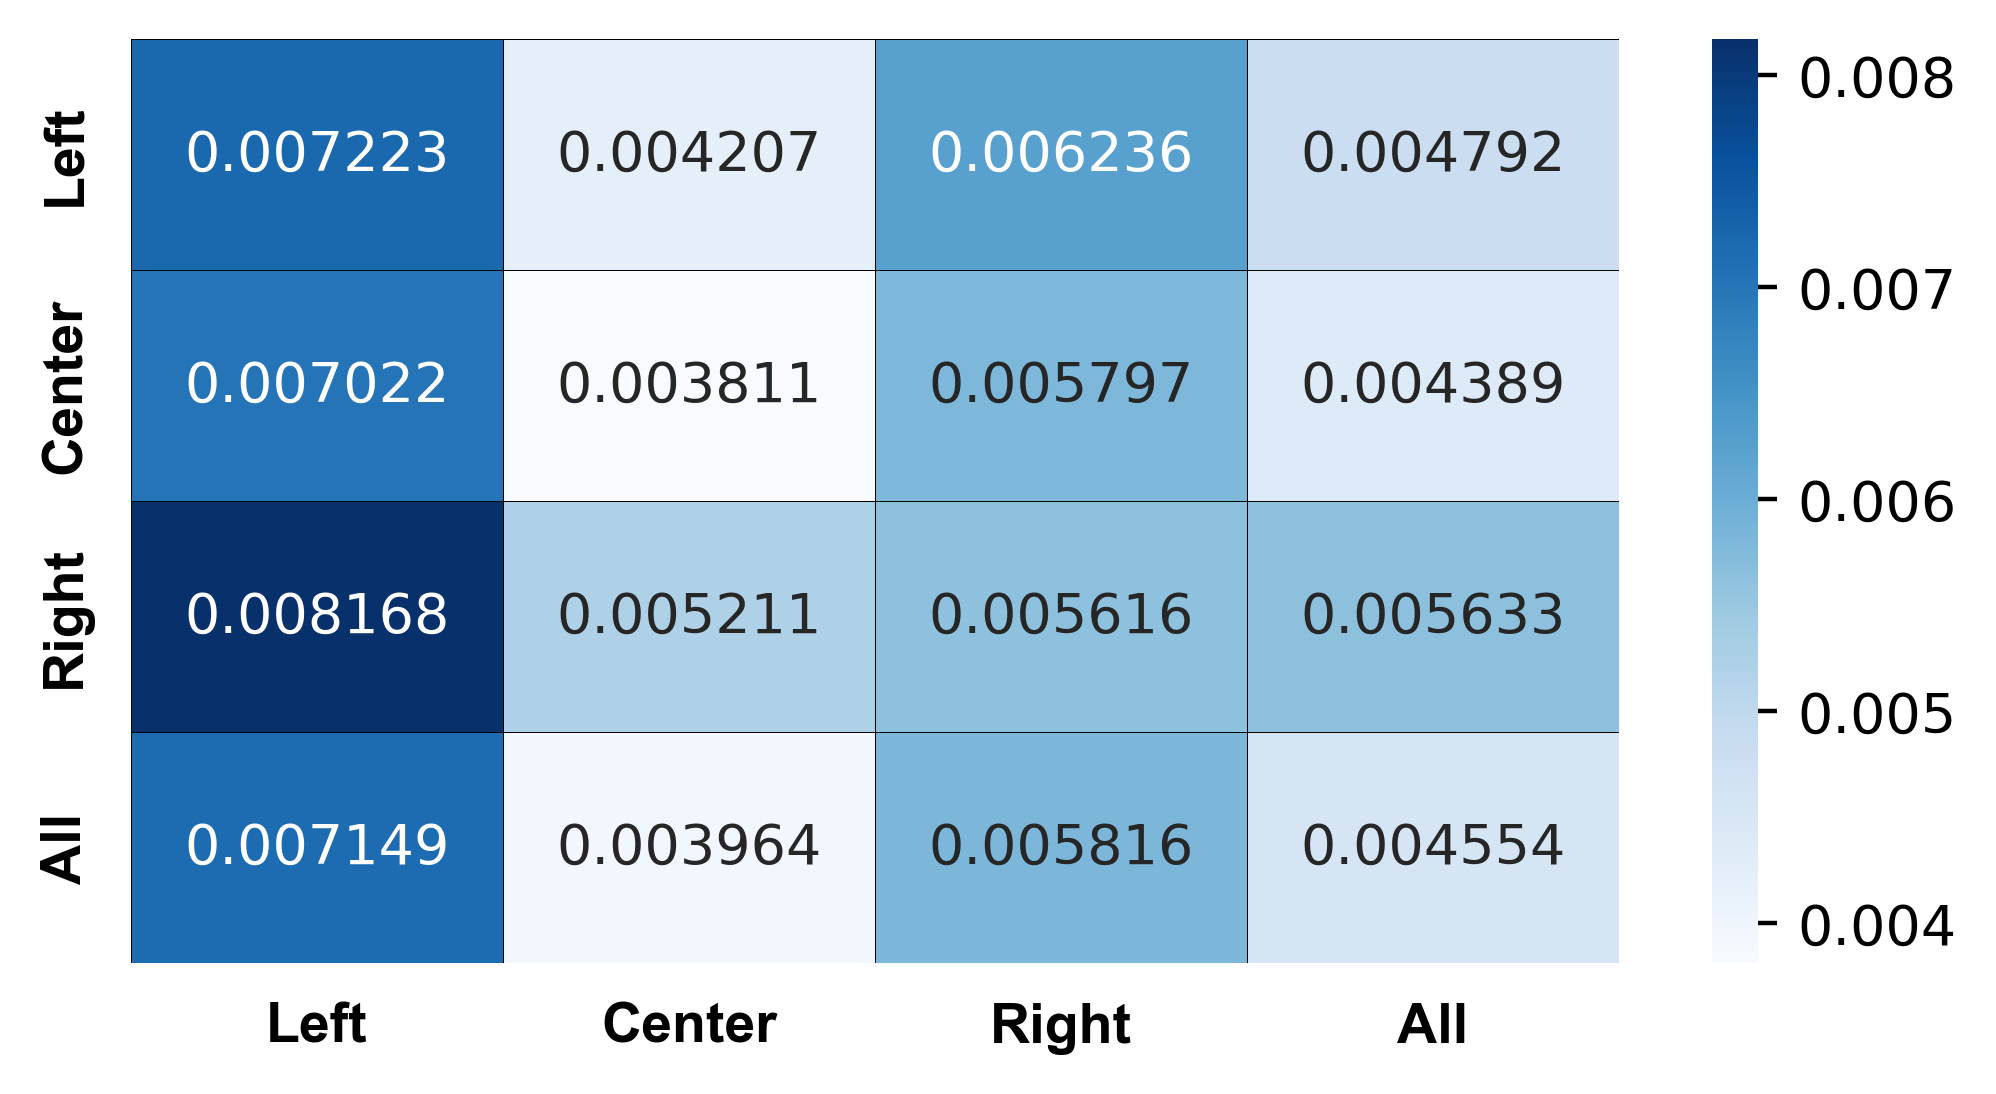

In [33]:
print('***** Wilcoxon-Mann-Whitney test *****')
pval_left_right = tuple(stats.mannwhitneyu(left_list, right_list, alternative='greater'))[1]
print('pval_left_right',pval_left_right)
pval_left_mid = tuple(stats.mannwhitneyu(left_list, mid_list, alternative='greater'))[1]
print('pval_left_mid',pval_left_mid)
pval_mid_right = tuple(stats.mannwhitneyu(mid_list, right_list, alternative='greater'))[1]
print('pval_mid_right',pval_mid_right)
print(np.median(left_list),np.median(mid_list),np.median(right_list))

plt.figure(figsize=(6,3),dpi=400)
sns.heatmap(df1, annot=df1.apply(lambda x: np.round(x,6)), fmt='.6f', cmap='Blues', linecolor='black', linewidths=0.1, annot_kws={"size": 10})
plt.yticks(fontproperties='Arial', size=10, weight='bold')
plt.xticks(fontproperties='Arial', size=10, weight='bold')
plt.tick_params(bottom=False,top=False,left=False,right=False)

# plt.savefig('../figures/leftright_vs_leftright_{}.pdf'.format(suffix), dpi=400,bbox_inches='tight',pad_inches=0)
plt.show()